In [13]:
import numpy as np
import glob
from scipy.optimize import curve_fit
import h5py
from natsort import natsorted
from scipy.signal import find_peaks, find_peaks_cwt
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import OrderedDict
#mpl.rcParams.update(mpl.rcParamsDefault)

In [14]:
!pwd

/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log


In [15]:
import sys
sys.path.insert(0,'../../')
sys.path.insert(0,'../../WaveformAnalysis')

In [16]:
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [17]:
import Dataset as Dataset
import Waveform as Waveform
import SiPM as SiPM

In [18]:
import importlib
importlib.reload(Dataset)
importlib.reload(SiPM)
importlib.reload(Waveform)

<module 'Waveform' from '/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log/../../WaveformAnalysis/Waveform.py'>

In [19]:
Path = r'/Users/tizi/Documents/YALE_WL.nosync/data/202206*/'

Let's get the voltage steps from the filenames

In [20]:
voltages = glob.glob(Path+'wave*')
voltages = [x.split('_')[-2] for x in voltages]
voltages = np.array(sorted([x.split('OV')[0] for x in voltages]))
voltages = np.unique(voltages)
print(voltages)

['2.00' '2.50' '3.00' '3.50' '4.00' '4.50' '5.00' '5.50' '6.00' '6.50'
 '7.00']


Now we can loop over all files for the various voltages, save the data and run a simple analysis including baseline subtraction and maximum finding

In [21]:
def line_gain(x,m,c):
    return (m*x)+c

In [22]:
def rebin(hx,h,bins):
    h_rebin=[]
    for i in range(int(len(h)/bins)):
        start_idx=i*bins
        end_idx=(i+1)*bins
        h_rebin.append(np.sum(h[start_idx:end_idx]))
    hx_rebin=range(len(h_rebin))
    return np.array(hx_rebin), np.array(h_rebin)

def rebin_2(hx,h,start, stop, step):
    rebinned = {}
    bins = np.arange(start,stop+step, step)
    for i, interval in enumerate(bins[:-1]):
        if not f'{bins[i]}-{bins[i+1]}' in rebinned.keys(): rebinned[f'{bins[i]}-{bins[i+1]}'] = 0
    print(rebinned)
    for val in hx:
        index = int(val/step)
        rebinned[rebinned.keys()]
    return
    h_rebin=[]
    for i in range(int(len(h)/bins)):
        start_idx=i*bins
        end_idx=(i+1)*bins
        h_rebin.append(np.sum(h[start_idx:end_idx]))
    hx_rebin=range(len(h_rebin))
    return np.array(hx_rebin), np.array(h_rebin)
#rebin_2(0,0,0,100,10)

[  24   38   51   63   77   85  103  111  133  155  164  187  213  226
  234  255  287  304  330  353  367  389  420  540  571  579  584  593
  609  650  659  674  697  734  743  760  778  785  790  802  810  818
  824  838  866  879  891  935  953  959  998 1024 1037 1059 1087 1098
 1118 1132 1162 1172 1192 1199 1208 1220 1244 1254 1259 1265 1285 1291
 1300 1308 1325 1343 1359 1370 1381 1389 1401 1414 1424 1443 1453 1460
 1469 1486 1496 1506 1532 1560 1578 1588 1603 1620 1627 1635 1666 1678
 1697 1722 1737 1753 1765 1779 1799 1808 1819 1827 1835 1842 1853 1867
 1879 1896 1915 1932 1948 1962 1981 1990 2005 2024 2035]
186.01892750713614
21
[94.91928563902363, 93.88254193574566, 92.059092196868, 93.22439214877468, 94.96714950522444, 94.08291999907412, 93.25527829291308, 94.28839602617899, 93.81815719691977, 94.39181159050717, 93.52762008070721, 93.44987629615262, 95.31516945278094, 92.69677130630393, 92.9421391497929, 94.4774371422421, 93.87903081348799, 95.13415894629742, 94.80495418553

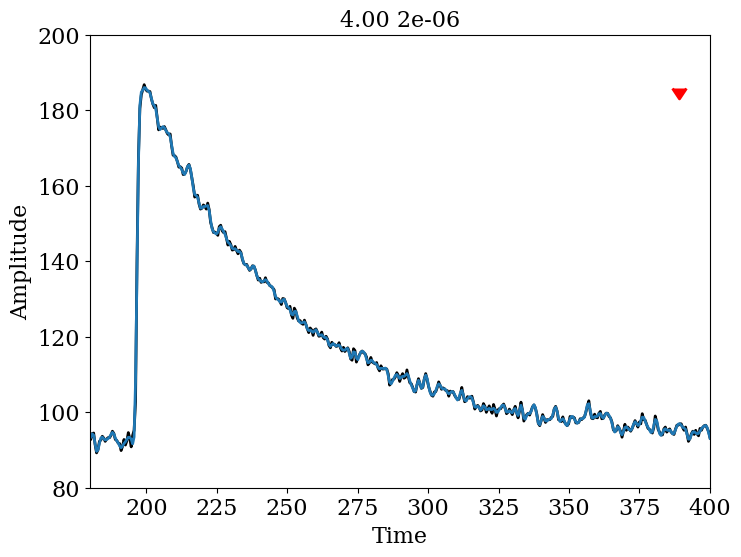

SystemExit: 

In [54]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

Ds = {}
N_peaks= 4
v_data = {}
for volt in voltages[4:5]: 
    Ds[volt] = SiPM.SiPM(Path=Path, Selection='wavefms_keith_{}OV*.h5'.format(volt))
    Ds[volt].Ch = [Waveform.Waveform(ID=x, Pol=1) for x in range(1,3)]
    
    peak_amps = {} #dict of shaping time as key and peak values for waveforms filtered with that shaping time
    peak_occs = {} #same thing but counting the occurrences so it will be a dict of dicts for each shaping time and peak
    all_v = []

    total = 0
    files = 0


    #The code below just loads the data from the files into the SiPM instance Ds[volt]
    for File in natsorted(Ds[volt].Files):
        # print(f'{total} waveforms in total (unfiltered) from {files} files')
        max_amp_all_st=[]
        files += 1
        Ds[volt].ImportDataFromHDF5(File, Ds[volt].Ch, var=[])
        Ds[volt].get_sampling()
        Ds[volt].shaping_time=[2e-6,5e-6,10e-6] #List of shaping times to shape the signal with
        # Ds[volt].shaping_time=[2e-6] #List of shaping times to shape the signal with
        Ds[volt].setup_butter_filter() # calculate the butterworth filter coefficients

    for waveform in Ds[volt].Ch[0].Amp: #loop over the waveforms inside the file
    # print(waveform)
        total += 1

        y = Ds[volt].get_filtered_waveform(waveform) # return the filtered waveform
        # y = [waveform]
        plt.plot(Ds[volt].Ch[0].Time,waveform,color='k',label='data')


        # max_amp,max_T=Ds[volt].Ch[0].GetAllMaxima(y)
        # max_amp_all_st.append(max_amp)
        # plt.plot(max_T,max_amp,'r*')  
        
        for i,y1 in enumerate(y): #Iterates each wave filtered with a different shaping time
            p_ind = np.argmax(y1) #Finds the index for max value in the waveform amplitude array
            pks = find_peaks(y1,prominence=2)[0]
            if len(pks) == 0:
                print(pks)
                plt.show()
                sys.exit()
                continue
            print(pks)
            converted = []
            for p in pks:
                converted.append(y1[p])
            p_ind = np.argmax(converted)
            p_val = converted[p_ind] #Gets the max value from the array of amps
            print(p_val)
            print(p_ind)
            print(converted)

            if not Ds[volt].shaping_time[i] in peak_amps.keys(): peak_amps[Ds[volt].shaping_time[i]] = [] #
            if not Ds[volt].shaping_time[i] in peak_occs.keys(): peak_occs[Ds[volt].shaping_time[i]] = {}

            peak_amps[Ds[volt].shaping_time[i]].append(p_val)

            if not p_val in np.array([*peak_occs[Ds[volt].shaping_time[i]].keys()]):
                peak_occs[Ds[volt].shaping_time[i]][p_val] = 1
            else: peak_occs[Ds[volt].shaping_time[i]][p_val] += 1
            all_v.append(p_val)
            print(np.where(y1 == p_val))
            #plt.plot(Ds[volt].Ch[0].Time[np.argmax(y1)],y1[np.argmax(y1)],'r+')
            plt.plot(Ds[volt].Ch[0].Time,y1,color=colors[i])
            plt.scatter(np.where(y1 == p_val)[0],p_val, color='red', marker=11)
            plt.xlim(180,400)
            plt.xlabel('Time')
            plt.ylabel('Amplitude')
            plt.title(str(volt)+' '+str(Ds[volt].shaping_time[i]))
            plt.show()
            sys.exit()
        # plt.xlim(180,225)

    # pp.pprint(peak_amps)

    v_data[volt] = peak_amps

[2.00V|2e-06]: Insufficient number of peaks --> NOT analyzed
[2.00V|5e-06]: Insufficient number of peaks --> NOT analyzed
[2.00V|1e-05]: Insufficient number of peaks --> NOT analyzed
1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[2.50V|2e-06]: Insufficient number of peaks --> NOT analyzed
[2.50V|5e-06]: Insufficient number of peaks --> NOT analyzed
[2.50V|1e-05]: Insufficient number of peaks --> NOT analyzed
1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[3.00V|2e-06]: Insufficient number of peaks --> NOT analyzed
[3.00V|5e-06]: Insufficient number of peaks --> NOT analyzed
[3.00V|1e-05]: Insufficient number of peaks --> NOT analyzed
1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[3.50V|2e-06]: Peak of 921 counts at amplitude 145 selected
[3.50V|2e-06]: Peak of 981 counts at amplitude 215 selected
[3.50V|2e-06]: Peak of 800 counts at 

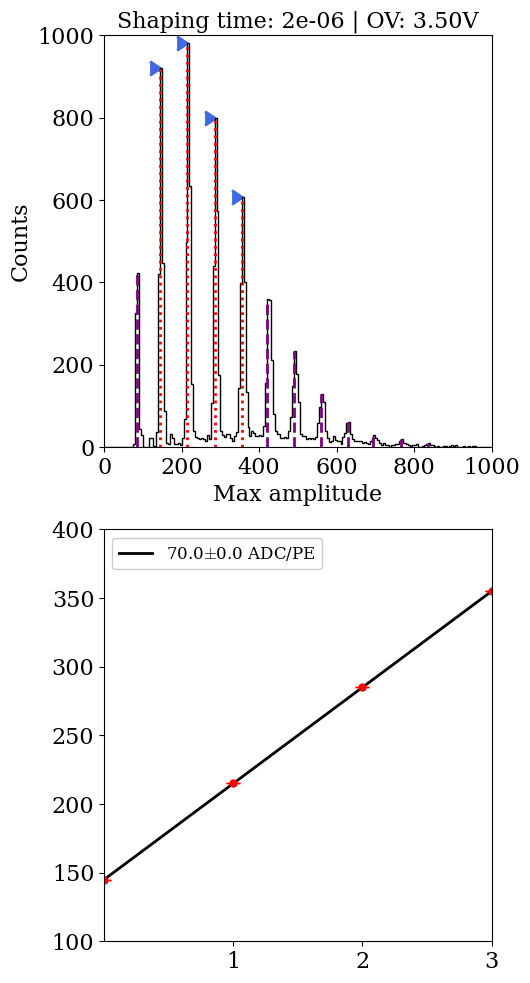

[3.50V|5e-06]: Peak of 880 counts at amplitude 145 selected
[3.50V|5e-06]: Peak of 938 counts at amplitude 220 selected
[3.50V|5e-06]: Peak of 739 counts at amplitude 295 selected
[3.50V|5e-06]: Peak of 632 counts at amplitude 365 selected
[3.50V|5e-06]: Peak of 557 counts at amplitude 80 not included
[3.50V|5e-06]: Peak of 387 counts at amplitude 435 not included
[3.50V|5e-06]: Peak of 208 counts at amplitude 505 not included
[3.50V|5e-06]: Peak of 126 counts at amplitude 580 not included
[3.50V|5e-06]: Peak of 66 counts at amplitude 650 not included
[3.50V|5e-06]: Peak of 30 counts at amplitude 720 not included
[3.50V|5e-06]: Peak of 21 counts at amplitude 790 not included
[3.50V|5e-06]: Line fitted – GAIN 73.49999999996399 | ERR 0.8660254037858988


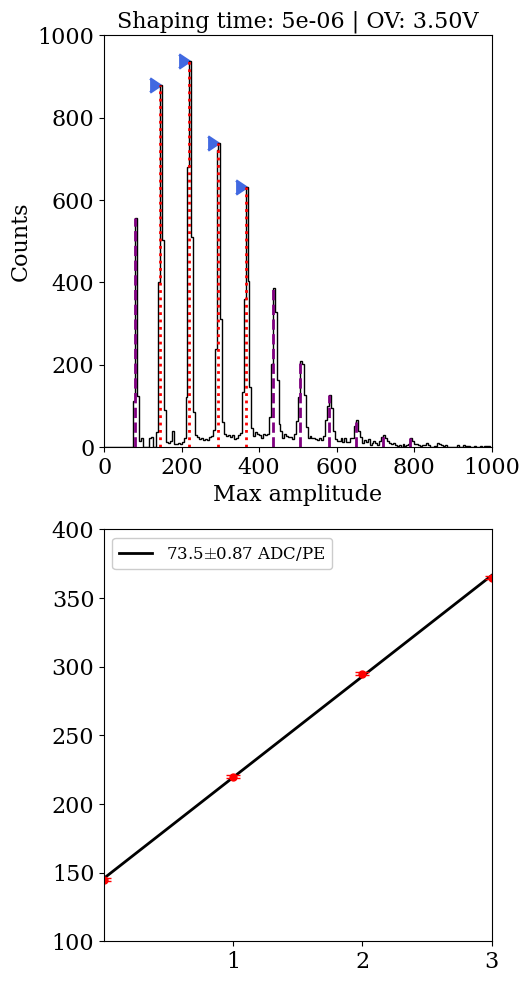

[3.50V|1e-05]: Peak of 924 counts at amplitude 145 selected
[3.50V|1e-05]: Peak of 1050 counts at amplitude 215 selected
[3.50V|1e-05]: Peak of 825 counts at amplitude 290 selected
[3.50V|1e-05]: Peak of 676 counts at amplitude 360 selected
[3.50V|1e-05]: Peak of 392 counts at amplitude 80 not included
[3.50V|1e-05]: Peak of 436 counts at amplitude 430 not included
[3.50V|1e-05]: Peak of 245 counts at amplitude 500 not included
[3.50V|1e-05]: Peak of 131 counts at amplitude 575 not included
[3.50V|1e-05]: Peak of 62 counts at amplitude 640 not included
[3.50V|1e-05]: Peak of 29 counts at amplitude 710 not included
[3.50V|1e-05]: Peak of 17 counts at amplitude 785 not included
[3.50V|1e-05]: Peak of 10 counts at amplitude 855 not included
[3.50V|1e-05]: Line fitted – GAIN 71.99999999996072 | ERR 0.7071067811876959


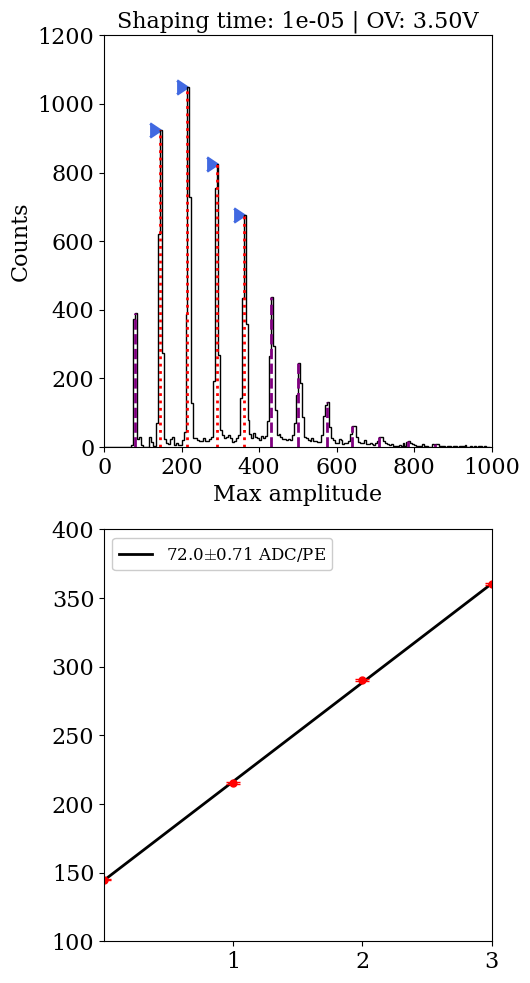

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[4.00V|2e-06]: Peak of 747 counts at amplitude 150 selected
[4.00V|2e-06]: Peak of 842 counts at amplitude 230 selected
[4.00V|2e-06]: Peak of 733 counts at amplitude 310 selected
[4.00V|2e-06]: Peak of 557 counts at amplitude 390 selected
[4.00V|2e-06]: Peak of 400 counts at amplitude 80 not included
[4.00V|2e-06]: Peak of 358 counts at amplitude 465 not included
[4.00V|2e-06]: Peak of 229 counts at amplitude 545 not included
[4.00V|2e-06]: Peak of 134 counts at amplitude 625 not included
[4.00V|2e-06]: Peak of 89 counts at amplitude 700 not included
[4.00V|2e-06]: Peak of 43 counts at amplitude 780 not included
[4.00V|2e-06]: Peak of 34 counts at amplitude 860 not included
[4.00V|2e-06]: Line fitted – GAIN 80.00000000000001 | ERR 1.797546735914701e-14


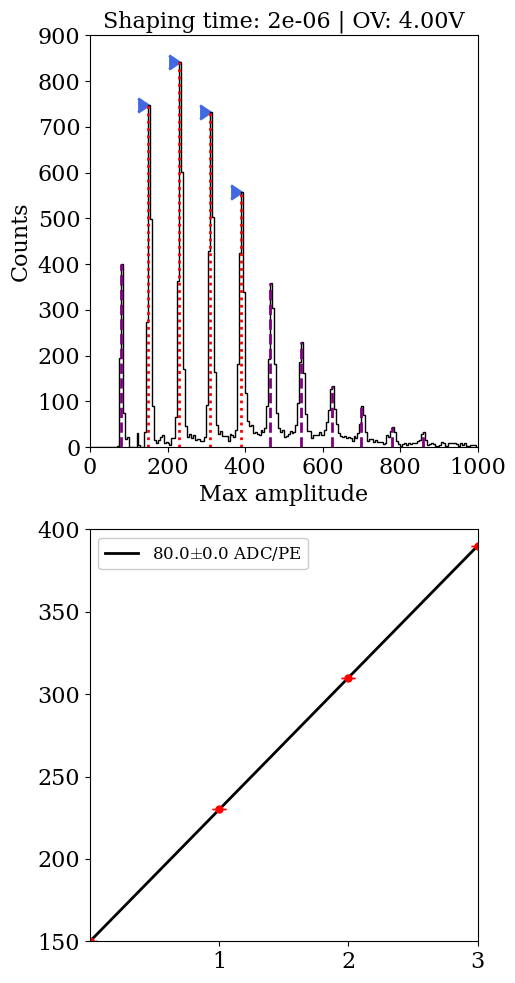

[4.00V|5e-06]: Peak of 692 counts at amplitude 150 selected
[4.00V|5e-06]: Peak of 862 counts at amplitude 235 selected
[4.00V|5e-06]: Peak of 709 counts at amplitude 320 selected
[4.00V|5e-06]: Peak of 553 counts at amplitude 400 selected
[4.00V|5e-06]: Peak of 419 counts at amplitude 75 not included
[4.00V|5e-06]: Peak of 335 counts at amplitude 480 not included
[4.00V|5e-06]: Peak of 224 counts at amplitude 565 not included
[4.00V|5e-06]: Peak of 127 counts at amplitude 645 not included
[4.00V|5e-06]: Peak of 82 counts at amplitude 725 not included
[4.00V|5e-06]: Peak of 38 counts at amplitude 805 not included
[4.00V|5e-06]: Peak of 26 counts at amplitude 890 not included
[4.00V|5e-06]: Line fitted – GAIN 83.49999999998579 | ERR 0.8660254037861804


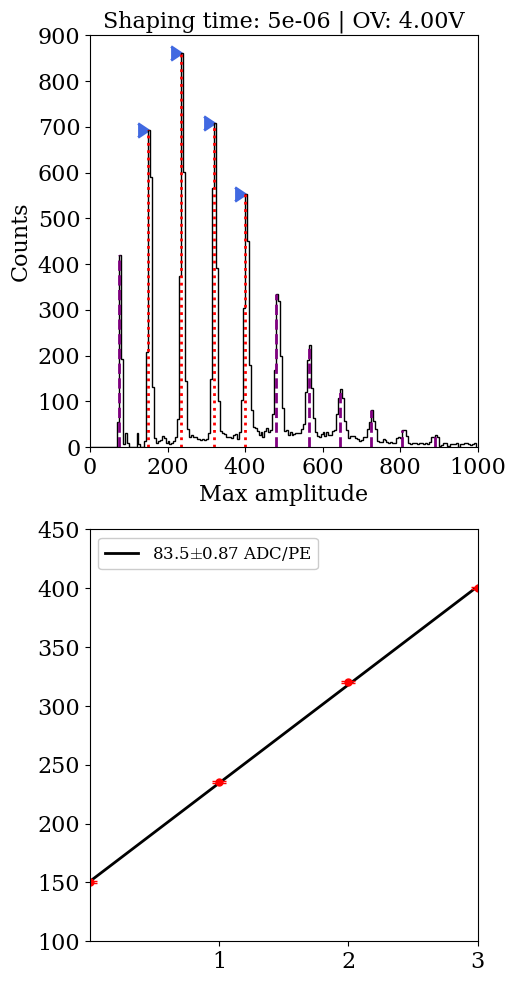

[4.00V|1e-05]: Peak of 818 counts at amplitude 150 selected
[4.00V|1e-05]: Peak of 831 counts at amplitude 230 selected
[4.00V|1e-05]: Peak of 737 counts at amplitude 315 selected
[4.00V|1e-05]: Peak of 595 counts at amplitude 395 selected
[4.00V|1e-05]: Peak of 416 counts at amplitude 75 not included
[4.00V|1e-05]: Peak of 388 counts at amplitude 475 not included
[4.00V|1e-05]: Peak of 233 counts at amplitude 555 not included
[4.00V|1e-05]: Peak of 134 counts at amplitude 640 not included
[4.00V|1e-05]: Peak of 90 counts at amplitude 715 not included
[4.00V|1e-05]: Peak of 45 counts at amplitude 805 not included
[4.00V|1e-05]: Peak of 29 counts at amplitude 880 not included
[4.00V|1e-05]: Line fitted – GAIN 82.0 | ERR 0.7071067811879391


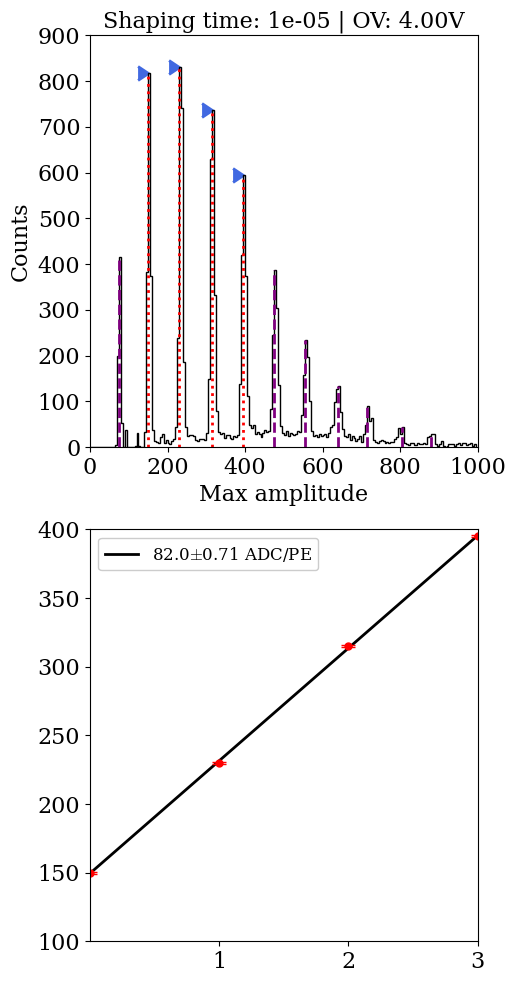

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[4.50V|2e-06]: Peak of 389 counts at amplitude 155 selected
[4.50V|2e-06]: Peak of 438 counts at amplitude 245 selected
[4.50V|2e-06]: Peak of 424 counts at amplitude 335 selected
[4.50V|2e-06]: Peak of 265 counts at amplitude 425 selected
[4.50V|2e-06]: Peak of 231 counts at amplitude 75 not included
[4.50V|2e-06]: Peak of 203 counts at amplitude 510 not included
[4.50V|2e-06]: Peak of 121 counts at amplitude 595 not included
[4.50V|2e-06]: Peak of 76 counts at amplitude 685 not included
[4.50V|2e-06]: Peak of 47 counts at amplitude 765 not included
[4.50V|2e-06]: Peak of 33 counts at amplitude 855 not included
[4.50V|2e-06]: Peak of 22 counts at amplitude 950 not included
[4.50V|2e-06]: Line fitted – GAIN 90.00000000000001 | ERR 1.797546735915192e-14


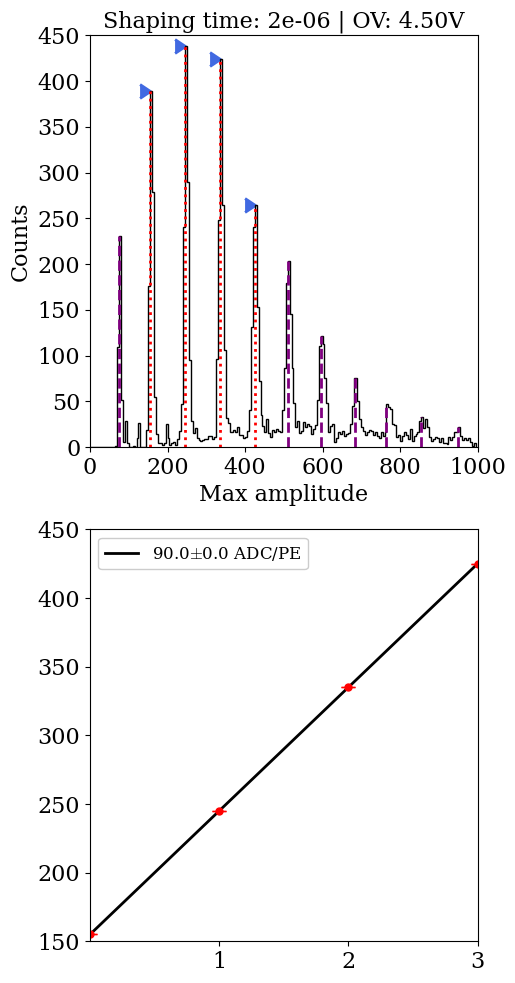

[4.50V|5e-06]: Peak of 350 counts at amplitude 155 selected
[4.50V|5e-06]: Peak of 416 counts at amplitude 250 selected
[4.50V|5e-06]: Peak of 428 counts at amplitude 345 selected
[4.50V|5e-06]: Peak of 248 counts at amplitude 435 selected
[4.50V|5e-06]: Peak of 231 counts at amplitude 70 not included
[4.50V|5e-06]: Peak of 199 counts at amplitude 525 not included
[4.50V|5e-06]: Peak of 121 counts at amplitude 620 not included
[4.50V|5e-06]: Peak of 76 counts at amplitude 705 not included
[4.50V|5e-06]: Peak of 44 counts at amplitude 800 not included
[4.50V|5e-06]: Peak of 32 counts at amplitude 895 not included
[4.50V|5e-06]: Line fitted – GAIN 93.50000000000762 | ERR 0.8660254037863997


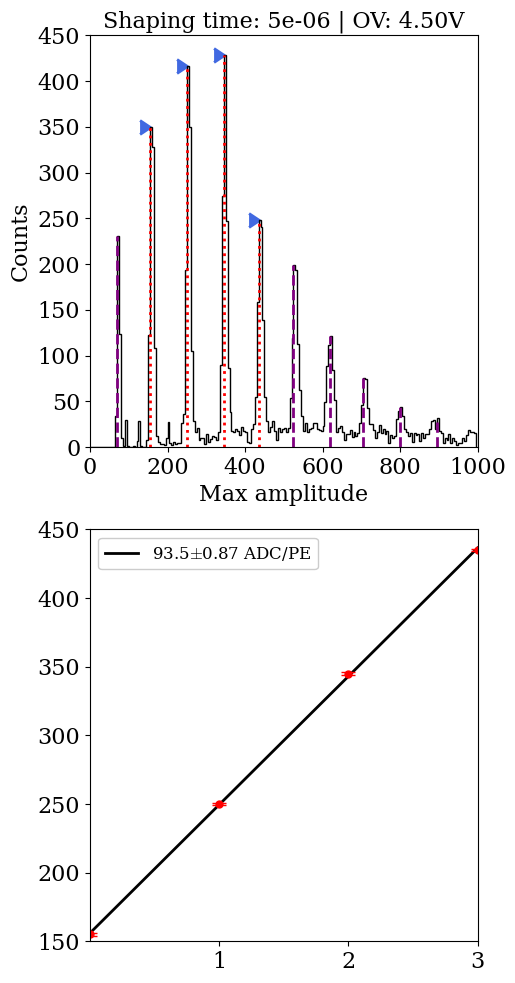

[4.50V|1e-05]: Peak of 399 counts at amplitude 155 selected
[4.50V|1e-05]: Peak of 423 counts at amplitude 245 selected
[4.50V|1e-05]: Peak of 443 counts at amplitude 340 selected
[4.50V|1e-05]: Peak of 287 counts at amplitude 430 selected
[4.50V|1e-05]: Peak of 230 counts at amplitude 70 not included
[4.50V|1e-05]: Peak of 232 counts at amplitude 520 not included
[4.50V|1e-05]: Peak of 146 counts at amplitude 610 not included
[4.50V|1e-05]: Peak of 81 counts at amplitude 700 not included
[4.50V|1e-05]: Peak of 47 counts at amplitude 785 not included
[4.50V|1e-05]: Peak of 36 counts at amplitude 885 not included
[4.50V|1e-05]: Peak of 19 counts at amplitude 975 not included
[4.50V|1e-05]: Line fitted – GAIN 92.0 | ERR 0.7071067811881233


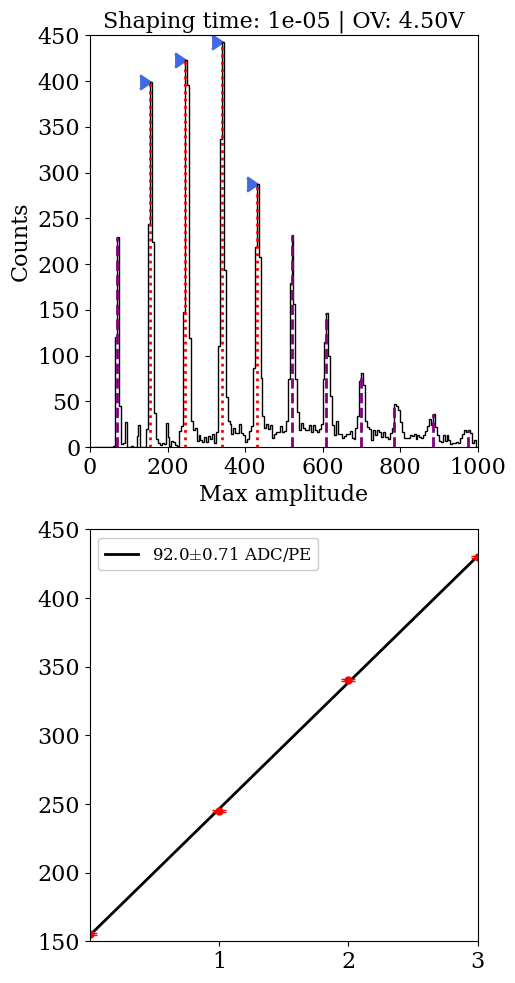

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[5.00V|2e-06]: Peak of 118 counts at amplitude 160 selected
[5.00V|2e-06]: Peak of 146 counts at amplitude 260 selected
[5.00V|2e-06]: Peak of 100 counts at amplitude 355 selected
[5.00V|2e-06]: Peak of 69 counts at amplitude 455 selected
[5.00V|2e-06]: Peak of 65 counts at amplitude 70 not included
[5.00V|2e-06]: Peak of 67 counts at amplitude 555 not included
[5.00V|2e-06]: Peak of 51 counts at amplitude 645 not included
[5.00V|2e-06]: Peak of 27 counts at amplitude 740 not included
[5.00V|2e-06]: Peak of 25 counts at amplitude 840 not included
[5.00V|2e-06]: Peak of 16 counts at amplitude 935 not included
[5.00V|2e-06]: Line fitted – GAIN 98.0 | ERR 0.7071067811882156


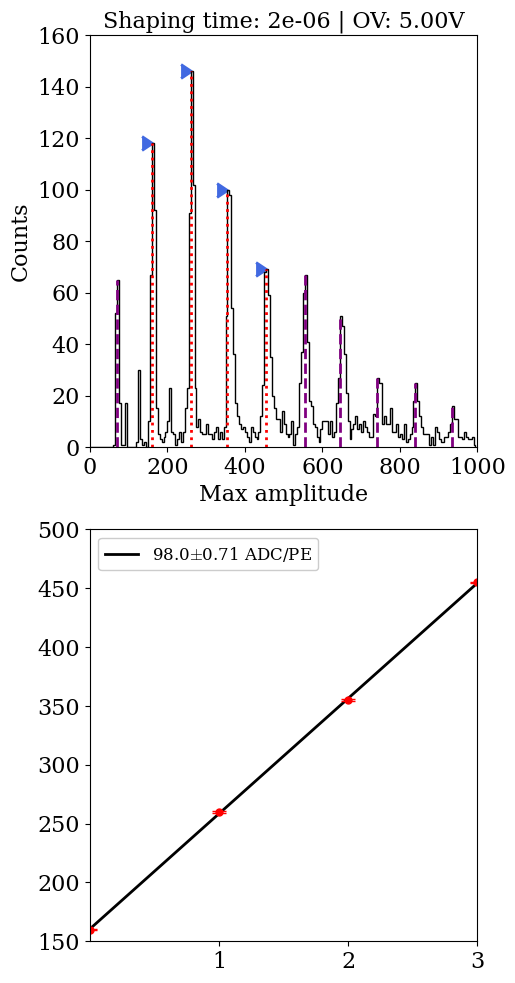

[5.00V|5e-06]: Peak of 76 counts at amplitude 65 selected
[5.00V|5e-06]: Peak of 103 counts at amplitude 165 selected
[5.00V|5e-06]: Peak of 134 counts at amplitude 270 selected
[5.00V|5e-06]: Peak of 108 counts at amplitude 370 selected
[5.00V|5e-06]: Peak of 74 counts at amplitude 470 not included
[5.00V|5e-06]: Peak of 79 counts at amplitude 570 not included
[5.00V|5e-06]: Peak of 47 counts at amplitude 670 not included
[5.00V|5e-06]: Peak of 28 counts at amplitude 775 not included
[5.00V|5e-06]: Peak of 23 counts at amplitude 875 not included
[5.00V|5e-06]: Peak of 13 counts at amplitude 975 not included
[5.00V|5e-06]: Line fitted – GAIN 102.0 | ERR 0.7071067811882703


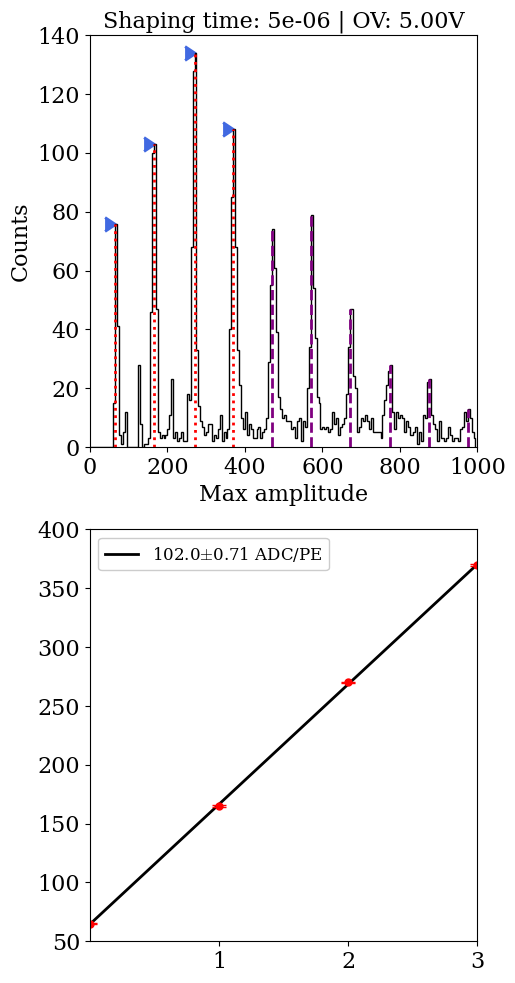

[5.00V|1e-05]: Peak of 121 counts at amplitude 160 selected
[5.00V|1e-05]: Peak of 139 counts at amplitude 260 selected
[5.00V|1e-05]: Peak of 111 counts at amplitude 360 selected
[5.00V|1e-05]: Peak of 82 counts at amplitude 465 selected
[5.00V|1e-05]: Peak of 63 counts at amplitude 65 not included
[5.00V|1e-05]: Peak of 77 counts at amplitude 565 not included
[5.00V|1e-05]: Peak of 52 counts at amplitude 660 not included
[5.00V|1e-05]: Peak of 31 counts at amplitude 765 not included
[5.00V|1e-05]: Peak of 28 counts at amplitude 865 not included
[5.00V|1e-05]: Peak of 14 counts at amplitude 960 not included
[5.00V|1e-05]: Line fitted – GAIN 101.50000000002507 | ERR 0.8660254037865317


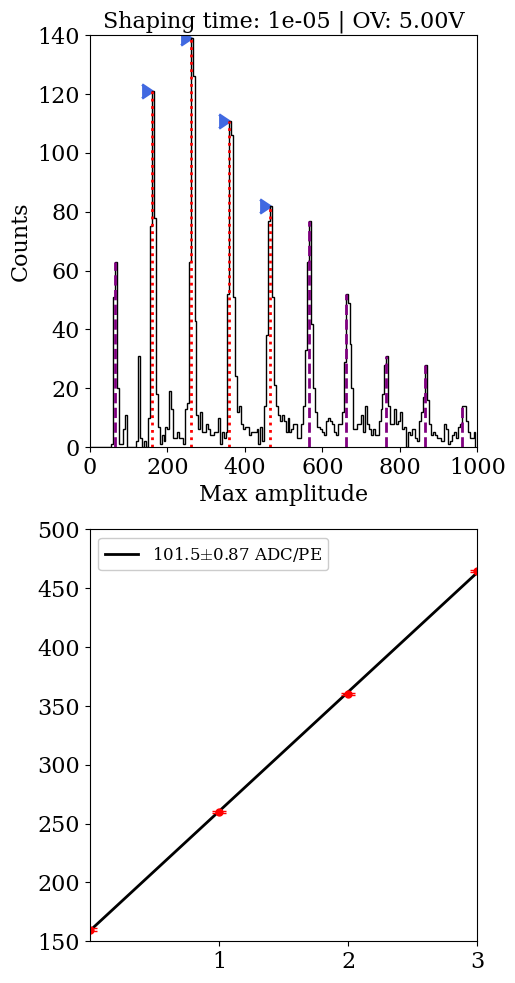

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[5.50V|2e-06]: Peak of 46 counts at amplitude 170 selected
[5.50V|2e-06]: Peak of 40 counts at amplitude 275 selected
[5.50V|2e-06]: Peak of 37 counts at amplitude 375 selected
[5.50V|2e-06]: Peak of 36 counts at amplitude 485 selected
[5.50V|2e-06]: Peak of 26 counts at amplitude 60 not included
[5.50V|2e-06]: Peak of 24 counts at amplitude 585 not included
[5.50V|2e-06]: Peak of 15 counts at amplitude 695 not included
[5.50V|2e-06]: Peak of 13 counts at amplitude 795 not included
[5.50V|2e-06]: Line fitted – GAIN 104.50000000000001 | ERR 1.3228756555355718


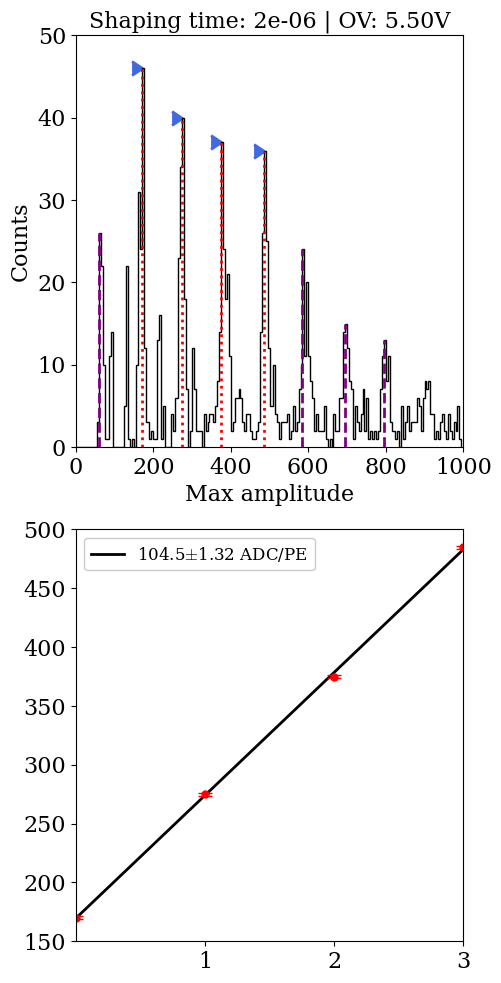

[5.50V|5e-06]: Peak of 30 counts at amplitude 60 selected
[5.50V|5e-06]: Peak of 35 counts at amplitude 175 selected
[5.50V|5e-06]: Peak of 46 counts at amplitude 280 selected
[5.50V|5e-06]: Peak of 31 counts at amplitude 390 selected
[5.50V|5e-06]: Peak of 29 counts at amplitude 500 not included
[5.50V|5e-06]: Peak of 22 counts at amplitude 610 not included
[5.50V|5e-06]: Peak of 15 counts at amplitude 715 not included
[5.50V|5e-06]: Peak of 12 counts at amplitude 820 not included
[5.50V|5e-06]: Peak of 11 counts at amplitude 940 not included
[5.50V|5e-06]: Line fitted – GAIN 109.49999999999999 | ERR 1.322875655535692


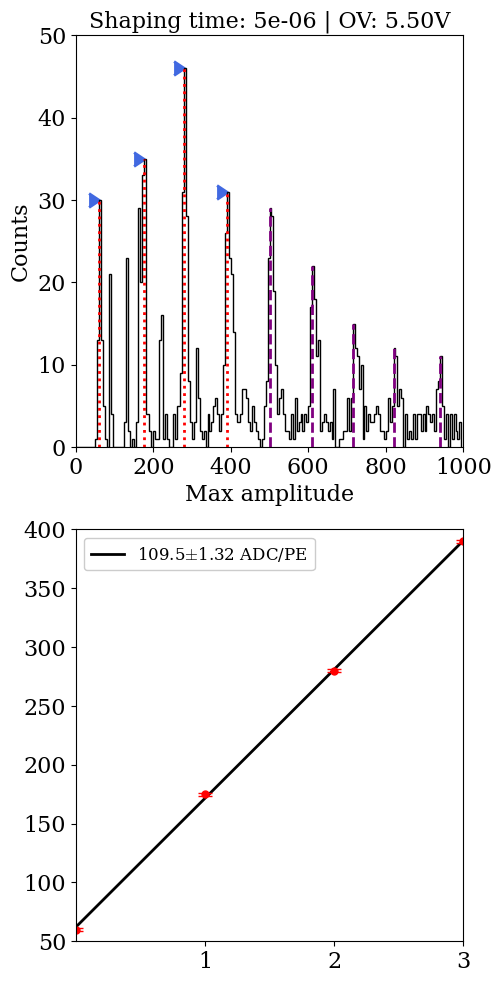

[5.50V|1e-05]: Peak of 38 counts at amplitude 170 selected
[5.50V|1e-05]: Peak of 41 counts at amplitude 275 selected
[5.50V|1e-05]: Peak of 31 counts at amplitude 380 selected
[5.50V|1e-05]: Peak of 38 counts at amplitude 495 selected
[5.50V|1e-05]: Peak of 25 counts at amplitude 60 not included
[5.50V|1e-05]: Peak of 21 counts at amplitude 600 not included
[5.50V|1e-05]: Peak of 14 counts at amplitude 705 not included
[5.50V|1e-05]: Peak of 12 counts at amplitude 810 not included
[5.50V|1e-05]: Line fitted – GAIN 108.00000000003925 | ERR 1.7320508075732781


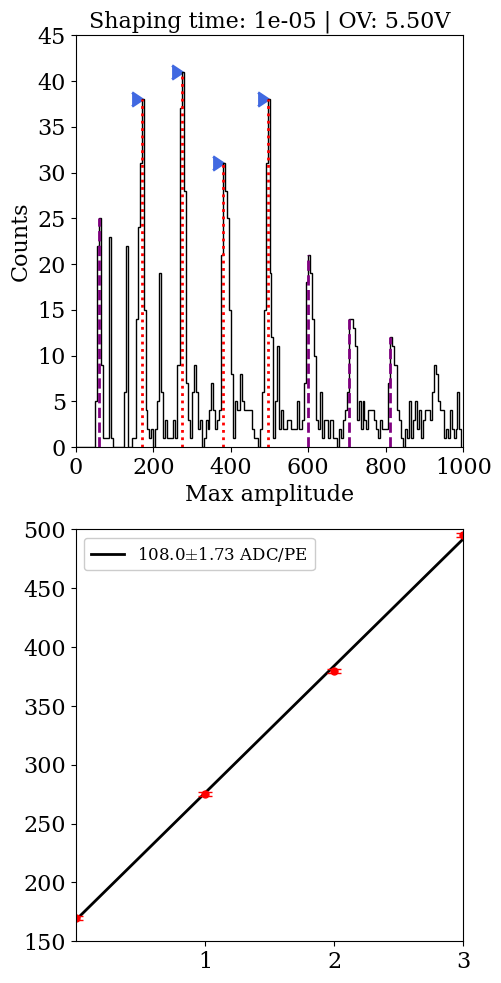

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[6.00V|2e-06]: Peak of 35 counts at amplitude 170 selected
[6.00V|2e-06]: Peak of 45 counts at amplitude 280 selected
[6.00V|2e-06]: Peak of 27 counts at amplitude 395 selected
[6.00V|2e-06]: Peak of 30 counts at amplitude 515 selected
[6.00V|2e-06]: Peak of 23 counts at amplitude 55 not included
[6.00V|2e-06]: Peak of 16 counts at amplitude 625 not included
[6.00V|2e-06]: Peak of 12 counts at amplitude 735 not included
[6.00V|2e-06]: Line fitted – GAIN 115.00000000000003 | ERR 1.5811388300883744


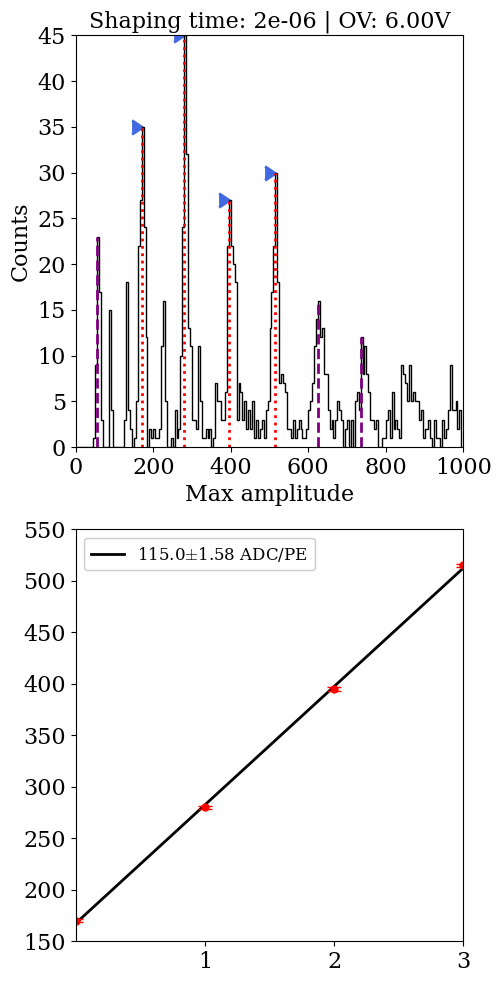

[6.00V|5e-06]: Peak of 31 counts at amplitude 175 selected
[6.00V|5e-06]: Peak of 51 counts at amplitude 290 selected
[6.00V|5e-06]: Peak of 27 counts at amplitude 410 selected
[6.00V|5e-06]: Peak of 28 counts at amplitude 535 selected
[6.00V|5e-06]: Peak of 21 counts at amplitude 50 not included
[6.00V|5e-06]: Peak of 19 counts at amplitude 645 not included
[6.00V|5e-06]: Peak of 13 counts at amplitude 770 not included
[6.00V|5e-06]: Line fitted – GAIN 120.00000000006543 | ERR 1.581138830088496


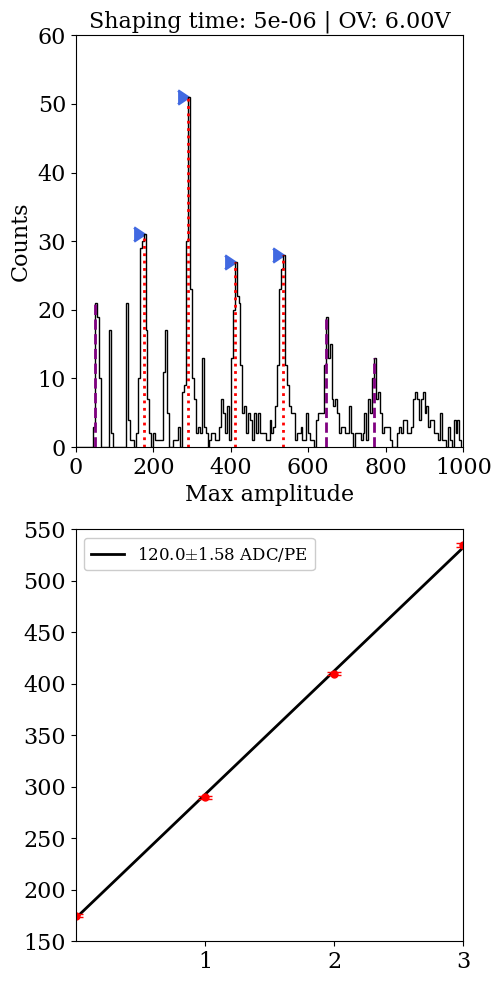

[6.00V|1e-05]: Peak of 52 counts at amplitude 285 selected
[6.00V|1e-05]: Peak of 29 counts at amplitude 400 selected
[6.00V|1e-05]: Peak of 41 counts at amplitude 525 selected
[6.00V|1e-05]: Peak of 22 counts at amplitude 635 selected
[6.00V|1e-05]: Peak of 23 counts at amplitude 50 not included
[6.00V|1e-05]: Peak of 29 counts at amplitude 165 not included
[6.00V|1e-05]: Peak of 18 counts at amplitude 225 not included
[6.00V|1e-05]: Peak of 12 counts at amplitude 760 not included
[6.00V|1e-05]: Peak of 11 counts at amplitude 870 not included
[6.00V|1e-05]: Line fitted – GAIN 117.50000000005994 | ERR 1.936491673108905


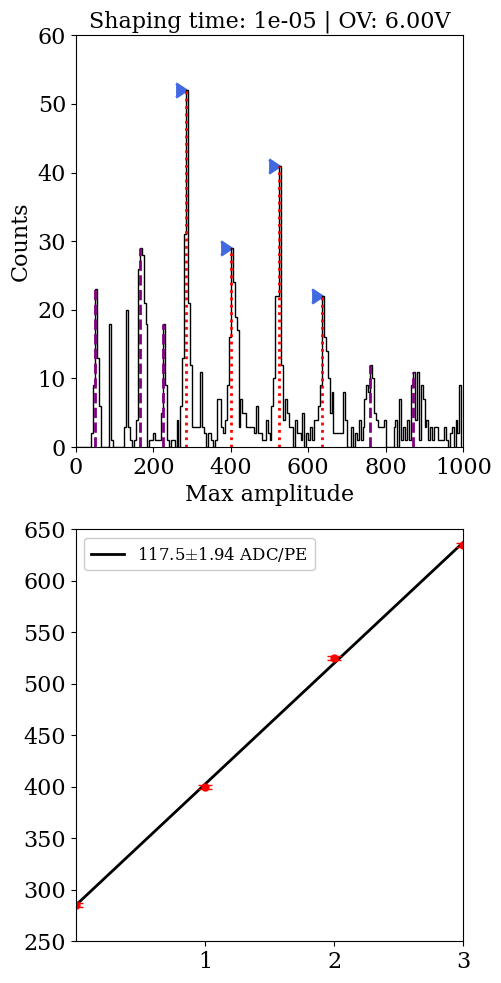

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[6.50V|2e-06]: Peak of 27 counts at amplitude 165 selected
[6.50V|2e-06]: Peak of 26 counts at amplitude 290 selected
[6.50V|2e-06]: Peak of 29 counts at amplitude 415 selected
[6.50V|2e-06]: Peak of 24 counts at amplitude 535 selected
[6.50V|2e-06]: Peak of 18 counts at amplitude 50 not included
[6.50V|2e-06]: Peak of 12 counts at amplitude 655 not included
[6.50V|2e-06]: Line fitted – GAIN 123.50000000007306 | ERR 0.8660254037868367


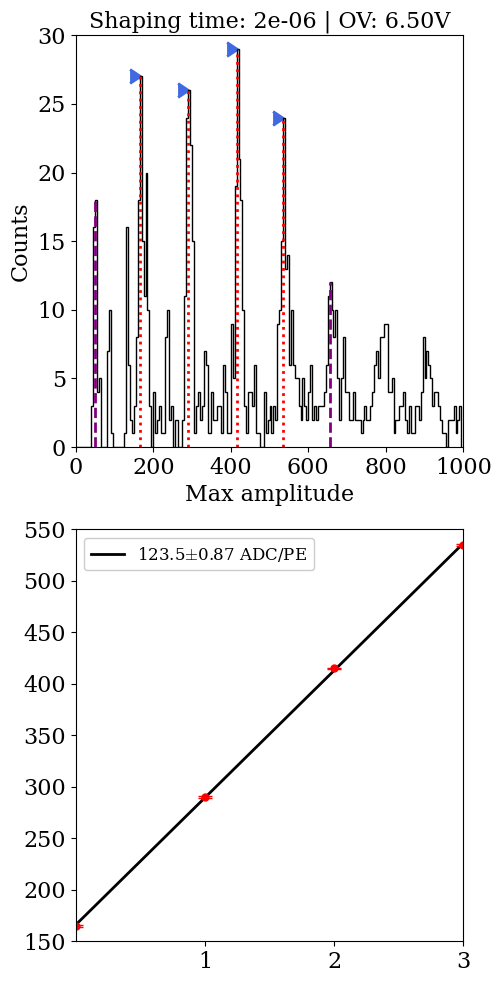

[6.50V|5e-06]: Peak of 26 counts at amplitude 170 selected
[6.50V|5e-06]: Peak of 25 counts at amplitude 295 selected
[6.50V|5e-06]: Peak of 26 counts at amplitude 430 selected
[6.50V|5e-06]: Peak of 26 counts at amplitude 555 selected
[6.50V|5e-06]: Peak of 19 counts at amplitude 45 not included
[6.50V|5e-06]: Peak of 11 counts at amplitude 675 not included
[6.50V|5e-06]: Peak of 11 counts at amplitude 825 not included
[6.50V|5e-06]: Line fitted – GAIN 129.00000000008504 | ERR 1.4142135623771122


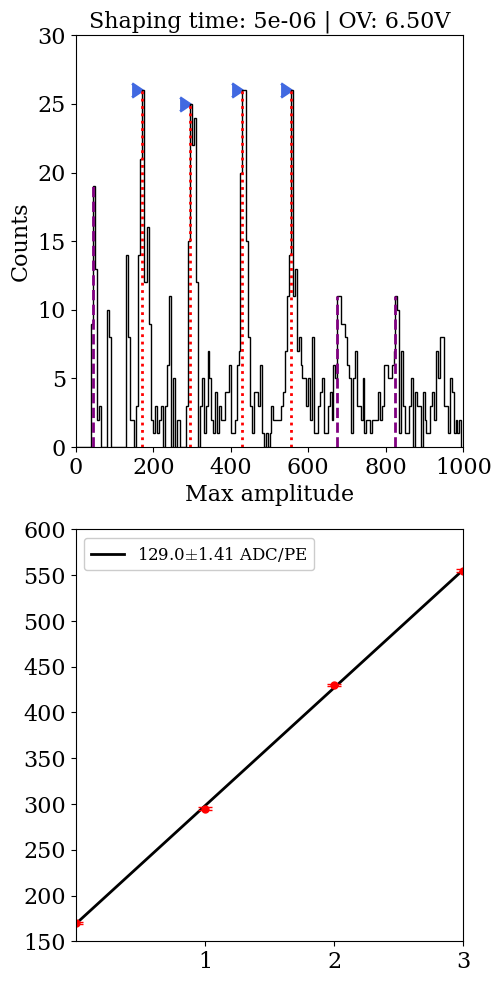

[6.50V|1e-05]: Peak of 26 counts at amplitude 295 selected
[6.50V|1e-05]: Peak of 27 counts at amplitude 425 selected
[6.50V|1e-05]: Peak of 31 counts at amplitude 545 selected
[6.50V|1e-05]: Peak of 18 counts at amplitude 670 selected
[6.50V|1e-05]: Peak of 17 counts at amplitude 45 not included
[6.50V|1e-05]: Peak of 25 counts at amplitude 165 not included
[6.50V|1e-05]: Peak of 13 counts at amplitude 235 not included
[6.50V|1e-05]: Peak of 12 counts at amplitude 810 not included
[6.50V|1e-05]: Peak of 10 counts at amplitude 925 not included
[6.50V|1e-05]: Line fitted – GAIN 124.5 | ERR 1.3228756555359793


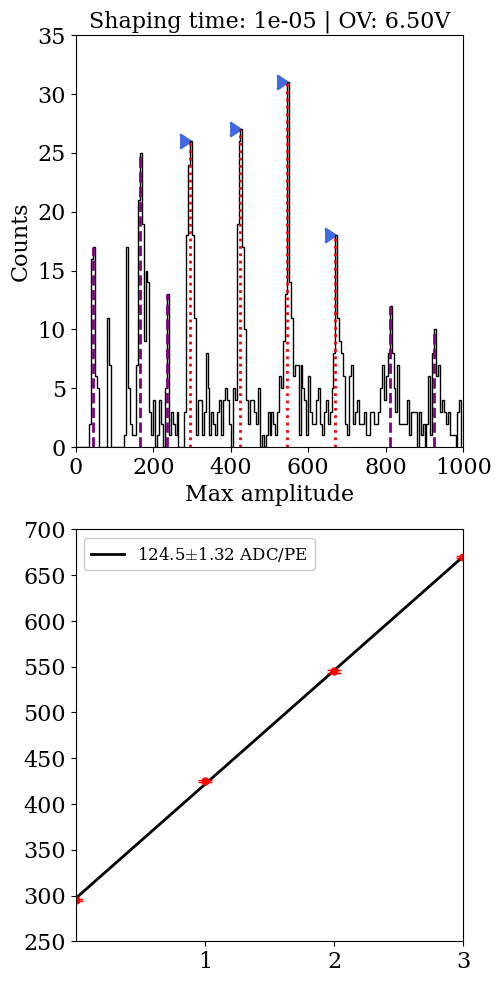

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------
[7.00V|2e-06]: Peak of 20 counts at amplitude 35 selected
[7.00V|2e-06]: Peak of 19 counts at amplitude 165 selected
[7.00V|2e-06]: Peak of 34 counts at amplitude 295 selected
[7.00V|2e-06]: Peak of 19 counts at amplitude 430 selected
[7.00V|2e-06]: Peak of 14 counts at amplitude 565 not included
[7.00V|2e-06]: Peak of 12 counts at amplitude 685 not included
[7.00V|2e-06]: Peak of 16 counts at amplitude 815 not included
[7.00V|2e-06]: Peak of 12 counts at amplitude 950 not included
[7.00V|2e-06]: Line fitted – GAIN 131.50000000009052 | ERR 0.866025403786919


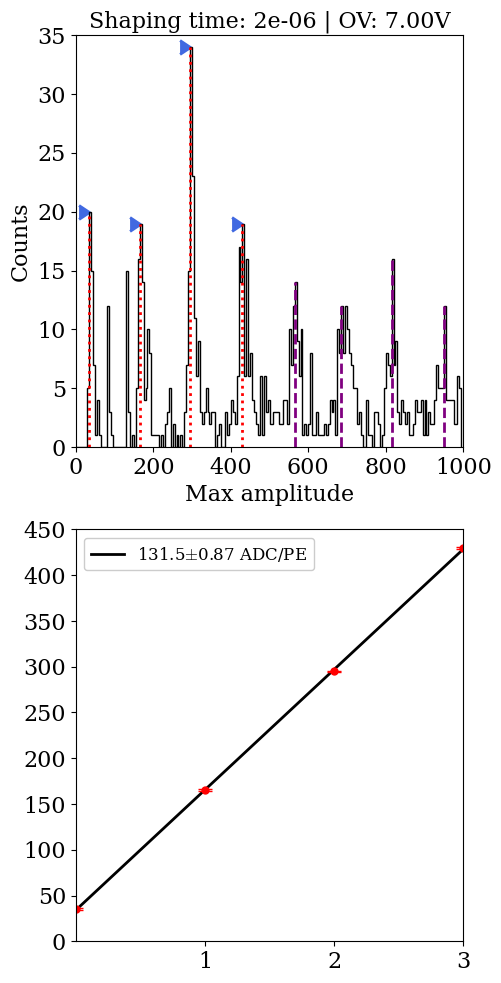

[7.00V|5e-06]: Peak of 18 counts at amplitude 35 selected
[7.00V|5e-06]: Peak of 18 counts at amplitude 165 selected
[7.00V|5e-06]: Peak of 36 counts at amplitude 305 selected
[7.00V|5e-06]: Peak of 17 counts at amplitude 440 selected
[7.00V|5e-06]: Peak of 16 counts at amplitude 585 not included
[7.00V|5e-06]: Peak of 14 counts at amplitude 725 not included
[7.00V|5e-06]: Line fitted – GAIN 135.5 | ERR 1.3228756555361507


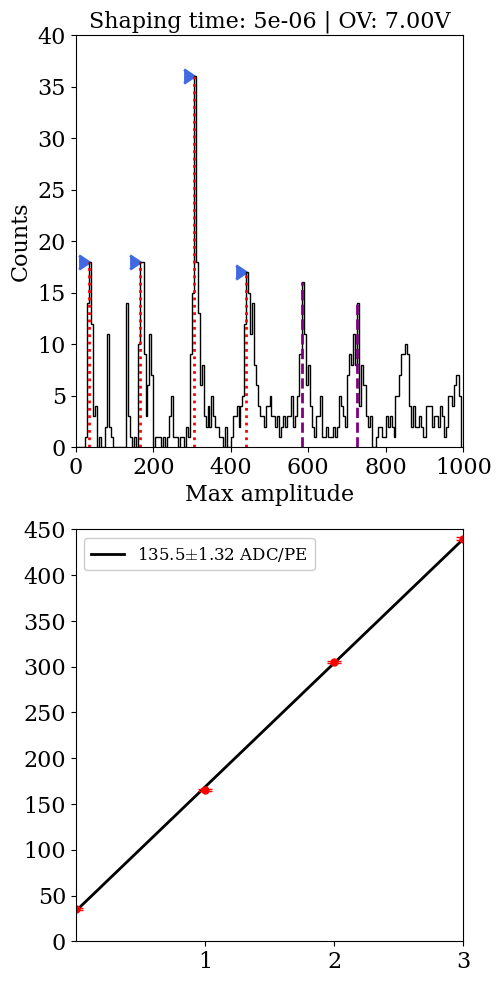

[7.00V|1e-05]: Peak of 21 counts at amplitude 30 selected
[7.00V|1e-05]: Peak of 20 counts at amplitude 165 selected
[7.00V|1e-05]: Peak of 30 counts at amplitude 300 selected
[7.00V|1e-05]: Peak of 18 counts at amplitude 435 selected
[7.00V|1e-05]: Peak of 18 counts at amplitude 575 not included
[7.00V|1e-05]: Peak of 16 counts at amplitude 710 not included
[7.00V|1e-05]: Peak of 13 counts at amplitude 835 not included
[7.00V|1e-05]: Line fitted – GAIN 134.99999999999997 | ERR 4.1324642619536094e-14


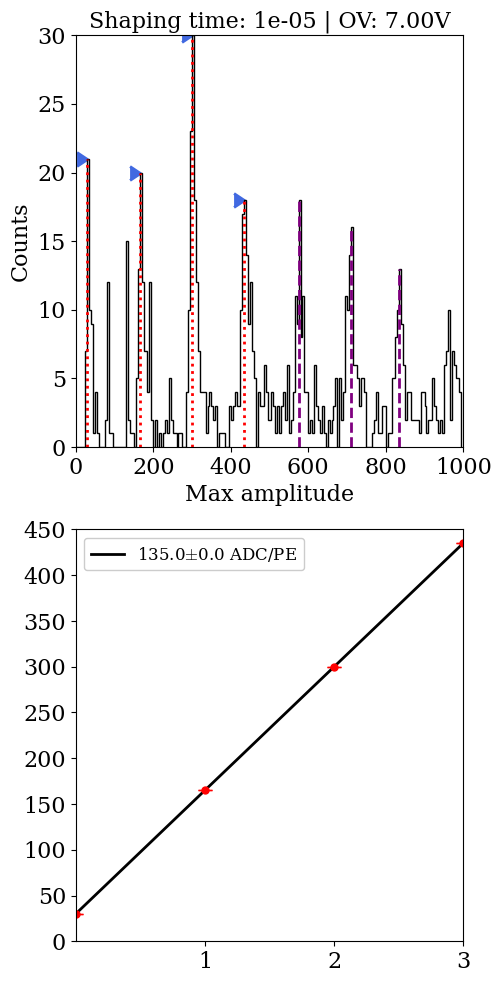

1340 waveforms in total (unfiltered) from 27 files
----------------------------------------------


In [174]:

peaks = {}

ANSI_RESET = '\u001b[0m'
ANSI_GREEN = '\u001b[32m'
ANSI_CYAN = '\u001b[36m'
ANSI_RED = '\u001b[31m'
ANSI_YELLOW = '\u001b[33m'

for volt in voltages:
    x_vals = []
    y_vals = []
    peak_amps = v_data[volt]

    for sh_time in peak_amps.keys():

        hor = []
        
        for peak in np.sort(np.fromiter(peak_occs[sh_time].keys(), dtype=float)):
            counts = peak_occs[sh_time][peak]
            x_vals.append(peak)
            y_vals.append(counts)

        # hx, h = rebin(x_vals,y_vals,100)
        # plt.plot(hx,h,color='k',label='data')
        BIN_W = 5
        plt.figure(figsize=(5,12))
        plt.subplot(2,1,1)
        plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W),histtype='step', color='black')
        # plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W+1),histtype='step', color='royalblue')
        # plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W+2),histtype='step', color='firebrick')
        # plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W+3),histtype='step', color='deepskyblue')
        x, y = np.histogram(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W))
        # plt.ylim(0,12)
        # plt.xlim(0,800)

        # p_indexes = find_peaks_cwt(x, widths=5,min_snr=1,gap_thresh=0,noise_perc=10)
        p_indexes = find_peaks(x, prominence=10,distance=12)[0]
        y_min = []
        y_max = []

        peaks_dict = OrderedDict()

        for ii, ind in enumerate(p_indexes):
            y_min.append(0)
            y_max.append(x[ind])
            #if ind == 0: hor.append((y[0]+y[ind])/2) #TODO CHECK THIS LINE OF CODE
            #else: hor.append((y[ind-1]+y[ind])/2)
            hor.append(y[ind])
            peaks_dict[y[ind]] = x[ind]
        
        plt.xlabel('Max amplitude')
        plt.ylabel('Counts')
        # plt.yscale('log')
        plt.title(f"Shaping time: {sh_time} | OV: {volt}V")
        # print(f'{volt} {p_indexes}')

        if len(p_indexes)>3:
            # plt.show()

            trials = []
            #print(peaks_dict.keys())
            for ii, pk in enumerate(np.array([*peaks_dict.values()])[:-3]):
                counts = pk
                #print([x for x in np.array([*peaks_dict.values()])[ii:ii+4]])

                #print('trial '+str(ii), end="   ")
                result = sum([x for x in np.array([*peaks_dict.values()])[ii:ii+4]])
                trials.append(result)
                #print(result)
            
            top_ind = trials.index(np.max(trials))
            #print(trials)
            #print(top_ind)
            #print(f'Top values are: {[x for x in np.array([*peaks_dict.values()])[top_ind:top_ind+4]]}')
            top_vals = [x for x in np.array([*peaks_dict.values()])[top_ind:top_ind+4]]

            y_min = []
            y_max = []
            hor=[]
            non_selected_y_min = []
            non_selected_y_max = []
            non_selected_hor = []

            for ii, pk in enumerate(np.array([*peaks_dict])[top_ind:top_ind+4]):
                if peaks_dict[pk] in top_vals:
                    hor.append(pk)
                    #print(f'Adding {pk} for pk {peaks_dict[pk]} and i {ii}')
                    y_min.append(0)
                    y_max.append(peaks_dict[pk])
                    print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} {ANSI_GREEN}Peak of {peaks_dict[pk]} counts at amplitude {pk} selected{ANSI_RESET}')
            
            for ii, pk in enumerate(np.array([*peaks_dict])):
                if ii < top_ind or ii >= top_ind+4:
                    non_selected_hor.append(pk)
                    non_selected_y_min.append(0)
                    non_selected_y_max.append(peaks_dict[pk])
                    print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} Peak of {peaks_dict[pk]} counts at amplitude {pk} not included')

            """ for ii, ind in enumerate(p_indexes):
                if not x[ind] in top_vals:
                    non_selected_y_min.append(0)
                    non_selected_y_max.append(x[ind])
                    non_selected_hor.append(y[ind])
                else:
                    y_min.append(0)
                    y_max.append(x[ind])
                    #if ind == 0: hor.append((y[0]+y[ind])/2) #TODO CHECK THIS LINE OF CODE
                    #else: hor.append((y[ind-1]+y[ind])/2)
                    hor.append(y[ind]) """

            plt.vlines(hor, y_min,y_max,color='red', linestyles='dotted')
            plt.scatter(hor,y_max,marker=5, color='royalblue')

            plt.vlines(non_selected_hor, non_selected_y_min, non_selected_y_max, color="purple", linestyles='dashed')

            """  plt.vlines(non_selected_hor, non_selected_y_min,non_selected_y_max,color='purple', linestyles='dashed')
            plt.scatter(non_selected_hor,non_selected_y_max,marker="*",color="purple") """

            plt.subplot(2,1,2)
            popt_temp,pcov_temp=curve_fit(line_gain,np.arange(0,len(y_max)),hor,p0=[90,5],maxfev=10000) #Use the straight line fit here
            plt.plot(np.arange(0,len(y_max)),line_gain(np.arange(0,len(y_max)),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' ADC/PE') # plot the straight line fit
            plt.xticks(np.arange(1,len(y_max)+1))
            perr = np.sqrt(np.diag(pcov_temp))[0]
            plt.legend(loc=2)
            print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} \u001b[44mLine fitted – GAIN {popt_temp[0]} | ERR {perr}{ANSI_RESET}')

            for ii, ind in enumerate(hor):
                pass# plt.plot(ii,ind,'r+')
            
            plt.errorbar(np.arange(0,len(y_max)),hor, yerr=perr, capsize=5, color='r', marker='o', ms=5, ls='None', label='Data')

            if not sh_time in peaks.keys(): peaks[sh_time] = OrderedDict()
            peaks[sh_time][volt] = {'popt': popt_temp[0], 'perr': perr}
            
            plt.show()
        else:
            print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RED} Insufficient number of peaks --> NOT analyzed{ANSI_RESET}')
            plt.clf()
            plt.close()
        # plt.show()

        x_vals = []
        y_vals = []

        
        

    print(f'{total} waveforms in total (unfiltered) from {files} files')

    print('----------------------------------------------')

[31.0V|2e-06]: Gain 70.0 --> !NOTE:  Error is too small --> replacing 0.0 with 1e-08
[31.5V|2e-06]: Gain 80.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735914701e-14 with 1e-08
[32.0V|2e-06]: Gain 90.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735915192e-14 with 1e-08
[32.5V|2e-06]: Gain 98.0, Err 0.7071067811882156 added to the array
[33.0V|2e-06]: Gain 104.50000000000001, Err 1.3228756555355718 added to the array
[33.5V|2e-06]: Gain 115.00000000000003, Err 1.5811388300883744 added to the array
[34.0V|2e-06]: Gain 123.50000000007306, Err 0.8660254037868367 added to the array
[34.5V|2e-06]: Gain 131.50000000009052, Err 0.866025403786919 added to the array


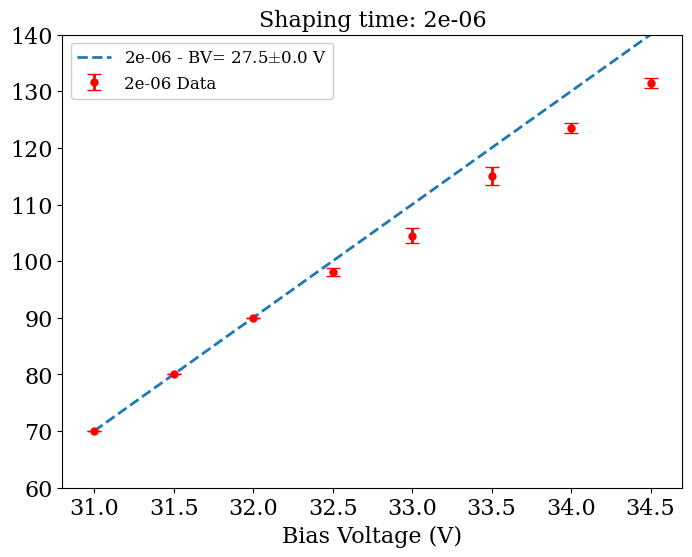

[31.0V|5e-06]: Gain 73.49999999996399, Err 0.8660254037858988 added to the array
[31.5V|5e-06]: Gain 83.49999999998579, Err 0.8660254037861804 added to the array
[32.0V|5e-06]: Gain 93.50000000000762, Err 0.8660254037863997 added to the array
[32.5V|5e-06]: Gain 102.0, Err 0.7071067811882703 added to the array
[33.0V|5e-06]: Gain 109.49999999999999, Err 1.322875655535692 added to the array
[33.5V|5e-06]: Gain 120.00000000006543, Err 1.581138830088496 added to the array
[34.0V|5e-06]: Gain 129.00000000008504, Err 1.4142135623771122 added to the array
[34.5V|5e-06]: Gain 135.5, Err 1.3228756555361507 added to the array


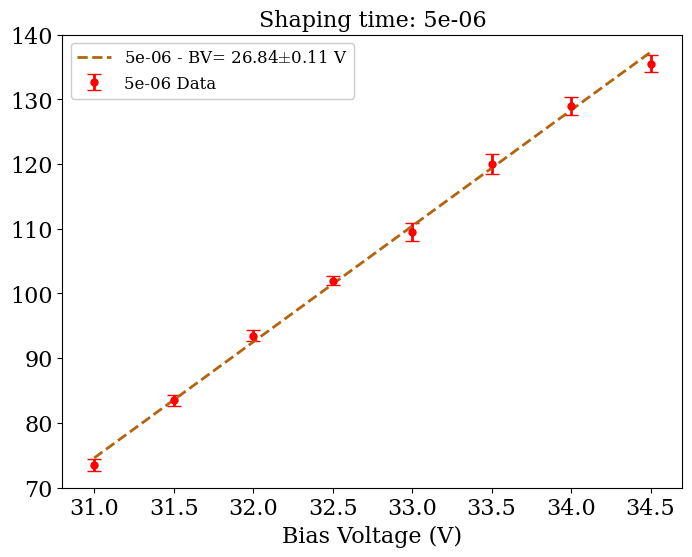

[31.0V|1e-05]: Gain 71.99999999996072, Err 0.7071067811876959 added to the array
[31.5V|1e-05]: Gain 82.0, Err 0.7071067811879391 added to the array
[32.0V|1e-05]: Gain 92.0, Err 0.7071067811881233 added to the array
[32.5V|1e-05]: Gain 101.50000000002507, Err 0.8660254037865317 added to the array
[33.0V|1e-05]: Gain 108.00000000003925, Err 1.7320508075732781 added to the array
[33.5V|1e-05]: Gain 117.50000000005994, Err 1.936491673108905 added to the array
[34.0V|1e-05]: Gain 124.5, Err 1.3228756555359793 added to the array
[34.5V|1e-05]: Gain 134.99999999999997 --> !NOTE:  Error is too small --> replacing 4.1324642619536094e-14 with 1e-08


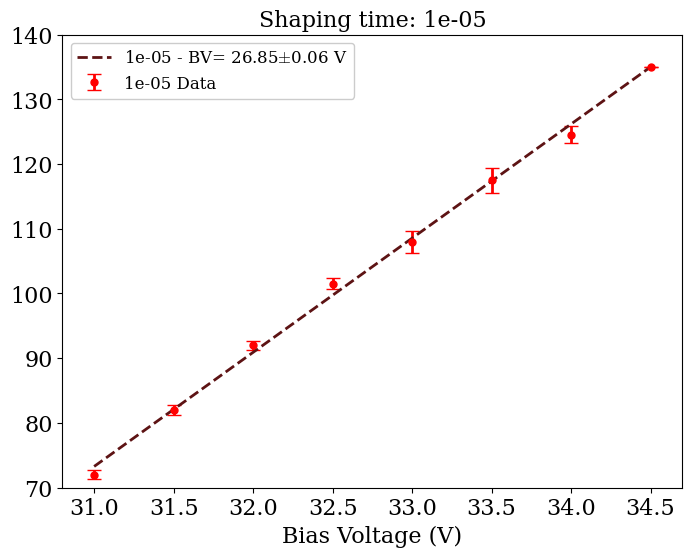

In [176]:
def line(x,a,b):
    return a*(x-b)

summarized_data = {}
#plt.figure(figsize=(10,10))
for ii, sh_time in enumerate(peaks.keys()):

    #print(peaks[sh_time])

    gain_temp = []
    err_temp = []
    for volt in peaks[sh_time].keys():
        opt = float(peaks[sh_time][volt]['popt'])
        err = peaks[sh_time][volt]['perr']
        if err < 1e-08:
            err = 1e-08
            print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_YELLOW} Gain {opt} --> !NOTE:  Error is too small --> replacing {peaks[sh_time][volt]["perr"]} with {err}{ANSI_RESET}') 
        else: print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_RESET} Gain {opt}, Err {err} added to the array{ANSI_RESET}')        

        gain_temp.append(opt)
        err_temp.append(err)

    volts = [float(x) + 27.5 for x in np.array([*peaks[sh_time].keys()])]
    x_data=np.arange(np.min(volts),np.max(volts)+0.1,0.5)
    plt.xlim(np.min(volts)-0.2,np.max(volts)+0.2)

    plt.errorbar(volts,gain_temp,yerr=err_temp,label=str(sh_time)+' Data',fmt='o',ms=5,color='red')
    popt_0,pcov_0=curve_fit(line,x_data,gain_temp,p0=[31,27],sigma=err_temp)
    if pcov_0[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = str(sh_time)+' - BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_0), color=colors[-ii], ls='--', label=label)
    # plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')
    #plt.ylabel('Gain (ADC/PE)')
    plt.xlabel('Bias Voltage (V)')
    plt.legend(loc=2)
    plt.title(f'Shaping time: {sh_time}')
    plt.show()
#plt.legend(loc=2)
#plt.show()

In [ ]:
""" def line(x,a,b):
    return a*x+b """

In [154]:
""" plt.figure()
plt.xlim(np.min(voltages.astype(float)), np.max(voltages.astype(float)))
plt.xlabel('Overvoltage [V]')
plt.ylabel('Max Amplitude [mV]')

ys = {}
ys[0] = []
ys[1] = []

for volt in voltages.astype(str): 
    markers = ['o', 'X']
    for i,ch in enumerate(Ds[volt].Ch):
        x = [float(volt)]*len(ch.Max)
        y = ch.Max
        ys[i].append(y[0])
        plt.scatter(x,y, marker=markers[i], color=colors[i], s=5)

xval = np.array([float(x) for x in voltages])
popt1,pcov1 = curve_fit(line, xval, np.array(ys[0]))      
popt2,pcov2 = curve_fit(line, xval, np.array(ys[1]))      

plt.plot(xval, line(xval,*popt1), label='Unfiltered')
plt.plot(xval, line(xval,*popt2), label='Filtered')
plt.legend(loc='upper left')
plt.show()  """

" plt.figure()\nplt.xlim(np.min(voltages.astype(float)), np.max(voltages.astype(float)))\nplt.xlabel('Overvoltage [V]')\nplt.ylabel('Max Amplitude [mV]')\n\nys = {}\nys[0] = []\nys[1] = []\n\nfor volt in voltages.astype(str): \n    markers = ['o', 'X']\n    for i,ch in enumerate(Ds[volt].Ch):\n        x = [float(volt)]*len(ch.Max)\n        y = ch.Max\n        ys[i].append(y[0])\n        plt.scatter(x,y, marker=markers[i], color=colors[i], s=5)\n\nxval = np.array([float(x) for x in voltages])\npopt1,pcov1 = curve_fit(line, xval, np.array(ys[0]))      \npopt2,pcov2 = curve_fit(line, xval, np.array(ys[1]))      \n\nplt.plot(xval, line(xval,*popt1), label='Unfiltered')\nplt.plot(xval, line(xval,*popt2), label='Filtered')\nplt.legend(loc='upper left')\nplt.show()  "

In [155]:
""" plt.figure() 
plt.xlim(0,400)
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
for volt in voltages: 
    markers = ['o', 'x']
    for i,ch in enumerate(Ds[volt].Ch[1:]):
        plt.plot(ch.Time, np.mean(ch.Amp, axis=0), label='{}V'.format(volt))
plt.legend(loc='upper left', ncol=1)
plt.show()  """

" plt.figure() \nplt.xlim(0,400)\nplt.xlabel('Time [$\\mu$s]')\nplt.ylabel('Amplitude [mV]')\nfor volt in voltages: \n    markers = ['o', 'x']\n    for i,ch in enumerate(Ds[volt].Ch[1:]):\n        plt.plot(ch.Time, np.mean(ch.Amp, axis=0), label='{}V'.format(volt))\nplt.legend(loc='upper left', ncol=1)\nplt.show()  "

In [156]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))

In [157]:
def gain_calculator(PATH):
    BINS=20 #Number of bins to rebin the MCA data with
    N_peaks= 4# Number o peaks to use for calculating the gain
    gain_list=[] #empty list to fill in the values of gain, returned at the end of this function
    gain_err=[] #empty list to fill in the values of gain fit error, returned at the end of this function
    Files = glob.glob(PATH+'mca_*.h5')
    #for loop to loop over all the files
    for i,file in enumerate(natsorted(Files)): 
        print(i,file)
        f = h5py.File(file, 'r')  
        ch2 = f.get('ch2')
        for key in ch2.keys():
            df = np.array(ch2.get(key))
        h = df
        hx = np.arange(0,len(h),1)
        hx,h = rebin(hx,h, BINS)

        gain_temp=[]#reset the gain temp list here to store gain values for one file
        gain_temp_err=[]#reset the gain temp list here to store gain values for one file
        #Use scipy find_peaks to find peaks starting with a very high prominence 
        PROMINENCE=1000 #This prominence is re-set here to ensure that every file starts out with a high prominence
        peaks,pdict=find_peaks(h,prominence=PROMINENCE,width=50)
        peak_length=len(peaks)
        #We want to ensure that using a high prominence gives us at least 3 peaks to fit a straight line to. If it doesn't we reduce prominence till we get at least 3 peaks. N_peaks is set above
        while (peak_length<N_peaks+1):
            PROMINENCE=PROMINENCE-1
            peaks,pdict=find_peaks(h,prominence=PROMINENCE,width=10)
            peak_length=len(peaks)
        
        #To avoid fitting the pedestal, we ignore the first peak. In case the pedestal isn't there, then first peak gets ignored. This shouldn't change gain or BV calculation
        first_pe_max=hx[peaks[1]] # The x-value of the 2nd peak.Index=1 means the second peak will be used for getting fit parameters
        max_value=h[peaks[1]] # The height of the 2nd peak
        x_idx_array=(h<0.5*max_value) & (hx>first_pe_max)# returns a boolean array where both conditions are true
        right_side_x= hx[np.where(x_idx_array)[0][0]] #finding the first time where x_idx_array is True
        sigma_guess=np.abs(first_pe_max-right_side_x) #We need this to fit the width of the Gaussian peaks

        plt.figure(figsize=(12,5)) # Call the figure here
        plt.subplot(1,2,1) #This subplot will plot the position of the peaks and also the data
        plt.yscale('log')
        plt.plot(hx[peaks],h[peaks],'*') # plot the peak markers
        plt.step(hx,h,lw=1) #plot the signal
        cut= (hx < first_pe_max+sigma_guess) & (hx > first_pe_max-sigma_guess) # This cut helps to fix the width of the peak-fit
        popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[max_value,first_pe_max,sigma_guess]) # We use curve_fit to return the optimal parameters and the covariance matrix
        plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5) # Here we plot the fit on the 2nd peak to see if everything looks ok.
        for i,peak in enumerate(peaks[:]): #here we ignore the first peak because it could be the pedestal
            new_first_pe_max=hx[peak] #x-value of the peak
            new_max_value=h[peak] #height of the peak
            new_x_idx_array=(h<0.5*new_max_value) & (hx>new_first_pe_max) # returns a boolean array where both conditions are true
            new_right_side_x= hx[np.where(new_x_idx_array)[0][0]] #finding the first time where x_idx_array is True
            new_sigma_guess=np.abs(new_first_pe_max-new_right_side_x) #We need this to fit the width of the Gaussian peaks


            new_cut= (hx < new_first_pe_max+new_sigma_guess) & (hx > new_first_pe_max-new_sigma_guess) # This cut helps to fix the width of the peak-fit
            popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[new_max_value,new_first_pe_max,new_sigma_guess],maxfev=100000) # We use curve_fit to return the optimal parameters and the covariance matrix
            plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3) # Here we plot the fit on all the peaks
            gain_temp.append(popt_new[1]) #Here we append the value of the peak fit mean 
            perr = np.sqrt(np.diag(pcov_new))
            gain_temp_err.append(perr[1])
        print(gain_temp)
        print(np.diff(gain_temp))
        print(np.mean(np.diff(gain_temp)))

        plt.subplot(1,2,2) #This subplot shows the straight line fit to the peak means to obtain the slope/gain
        popt_temp,pcov_temp=curve_fit(line_gain,np.arange(0,len(peaks)),gain_temp,p0=[90,5],maxfev=10000) #Use the straight line fit here
        plt.plot(np.arange(0,len(peaks)),line_gain(np.arange(0,len(peaks)),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' ADC/PE') # plot the straight line fit
        

        plt.errorbar(np.arange(0,len(peaks)),gain_temp, yerr=gain_temp_err, capsize=5, color='r', marker='o', ms=5, ls='None', label='Data') #plot the values of the peak means
        plt.legend(loc=2)
        plt.show() #show the plot
        gain_list.append(popt_temp[0]) #append the gain values to obtain BV later
        gain_err.append(np.sqrt(np.diag(pcov_temp))[0]) #append the straight line error fit 
    return(np.array(gain_list),np.array(gain_err))

0 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_2.00OV.h5
[18.210866381415116, 65.18146133164583, 114.87401065882027, 164.7562800448003, 214.24623957330962]
[46.97059495 49.69254933 49.88226939 49.48995953]
49.00884329797363


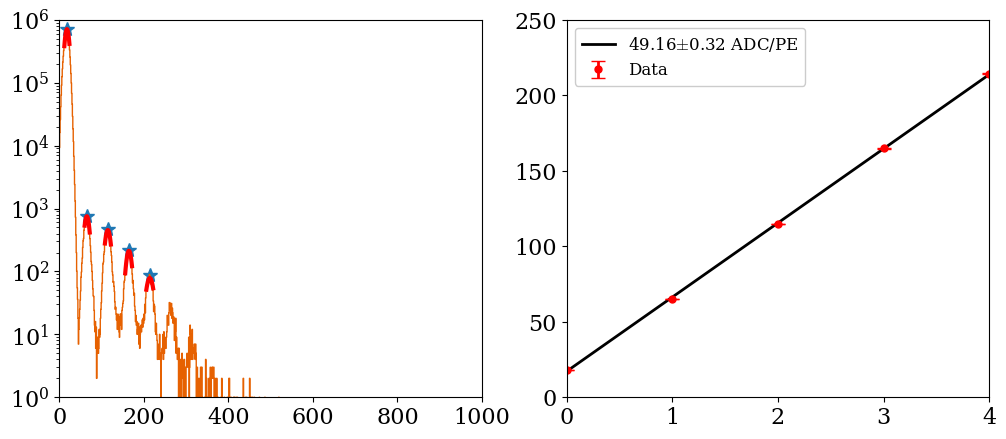

1 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_2.50OV.h5
[18.091901865347094, 79.44612798734416, 143.1638485856934, 207.30558538166898, 271.8183397752412]
[61.35422612 63.7177206  64.1417368  64.51275439]
63.43160947747353


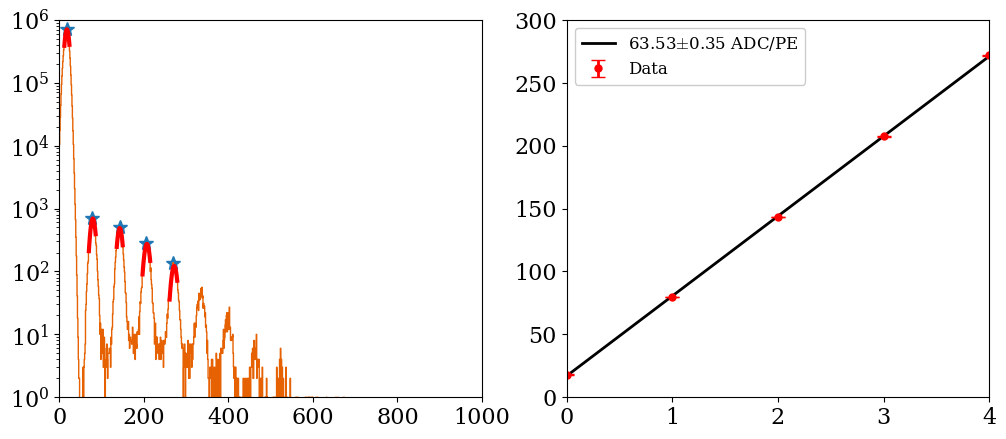

2 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_3.00OV.h5
[17.95716566026973, 93.12677906589465, 171.7625359430762, 250.23401820632353, 328.64474168895134]
[75.16961341 78.63575688 78.47148226 78.41072348]
77.67189400717041


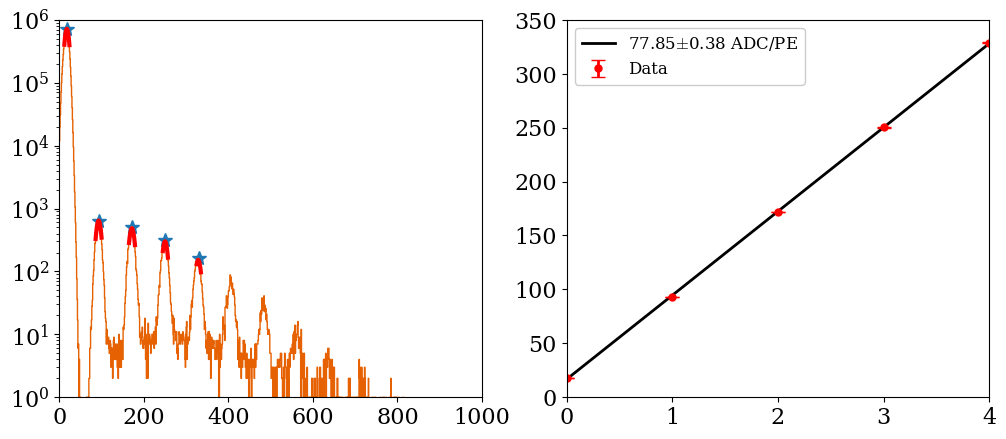

3 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_3.50OV.h5
[17.786009122892093, 107.17730233094353, 199.4464609285234, 291.4212784221778, 383.4404637745696]
[89.39129321 92.2691586  91.97481749 92.01918535]
91.41361366291937


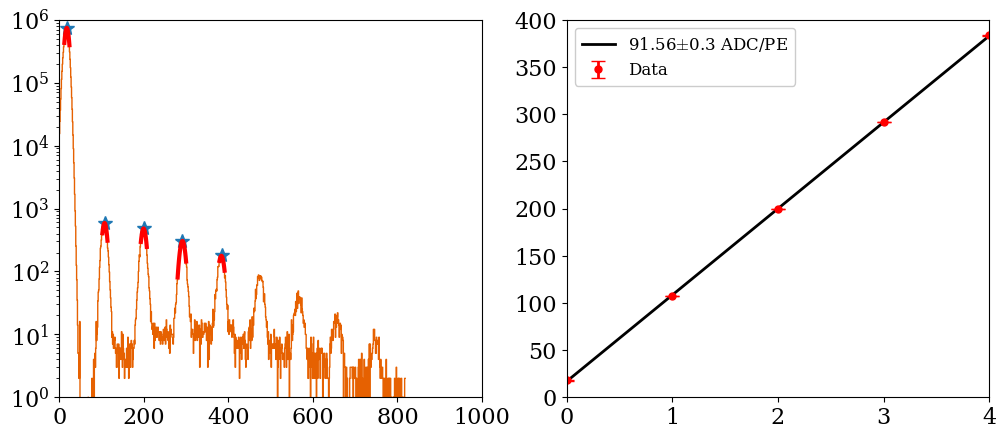

4 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_4.00OV.h5
[17.62951207995535, 120.70738594225804, 226.71735888784892, 332.41297908769076, 438.2929322399371]
[103.07787386 106.00997295 105.6956202  105.87995315]
105.16585503999545


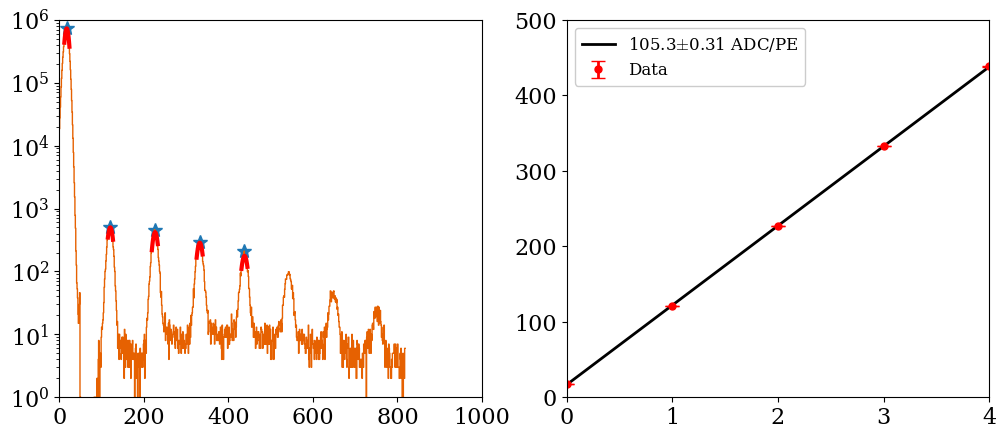

5 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_4.50OV.h5
[17.527810375749127, 134.0514204792527, 253.8594548729966, 372.9787559651682, 491.8090987059302]
[116.5236101  119.80803439 119.11930109 118.83034274]
118.57032208254526


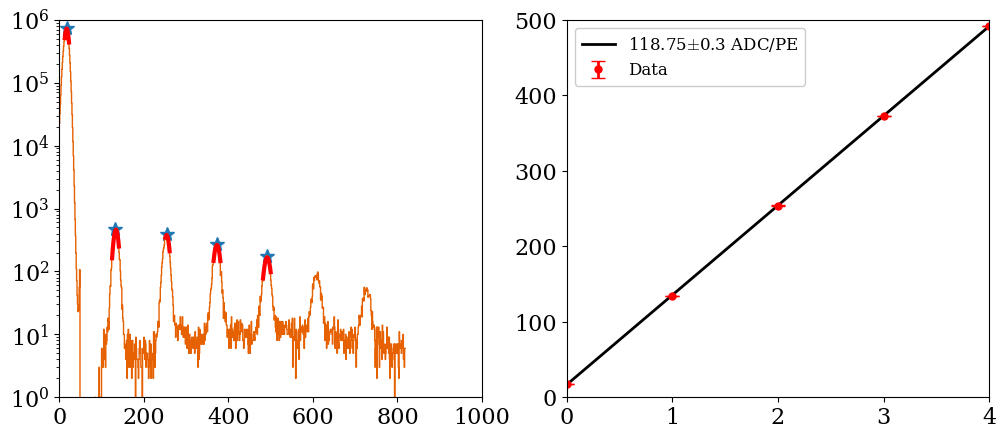

6 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_5.00OV.h5
[17.337380246926813, 147.13949404013437, 279.66450920232995, 411.56015449133, 543.3892930197694]
[129.80211379 132.52501516 131.89564529 131.82913853]
131.51297819321064


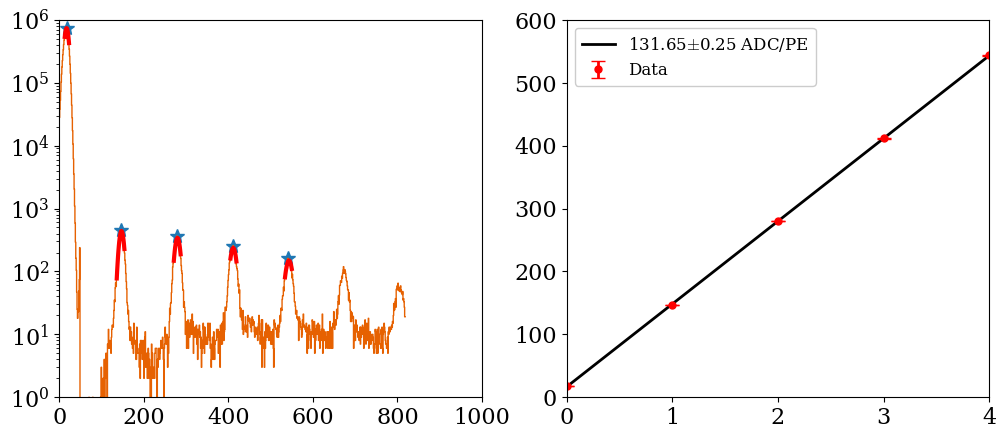

7 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_5.50OV.h5
[17.073762992464708, 159.9878087537576, 304.8881367891229, 450.121126996276, 594.1774029367501]
[142.91404576 144.90032804 145.23299021 144.05627594]
144.27590998607135


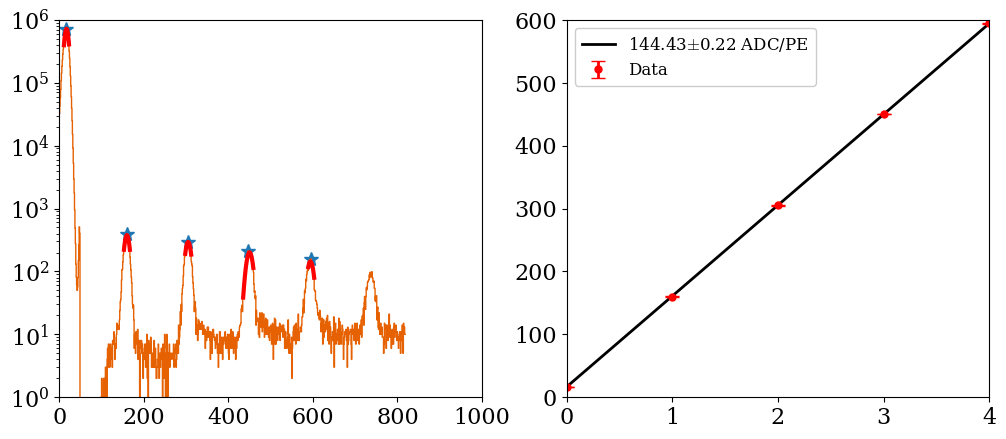

8 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_6.00OV.h5
[16.848782200202866, 171.54109520232595, 329.50343715268974, 486.28006444740305, 642.1906778450114]
[154.692313   157.96234195 156.77662729 155.9106134 ]
156.33547391120214


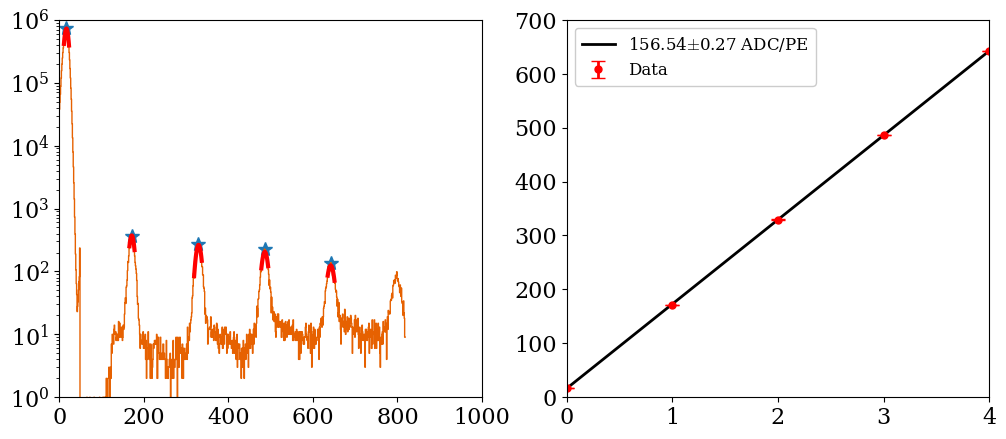

9 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_6.50OV.h5
[16.652570785385752, 183.5969893081587, 352.89376285163996, 521.923516202823, 689.3914166274942]
[166.94441852 169.29677354 169.02975335 167.46790042]
168.18471146052713


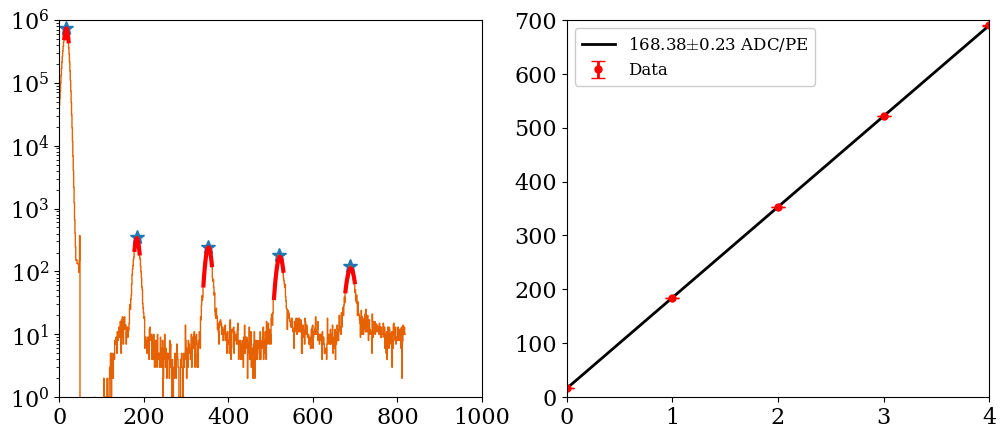

10 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_7.00OV.h5
[16.35577096655004, 195.01968533316872, 375.597686020387, 555.7169082173967, 734.1686572121764]
[178.66391437 180.57800069 180.1192222  178.45174899]
179.4532215614066


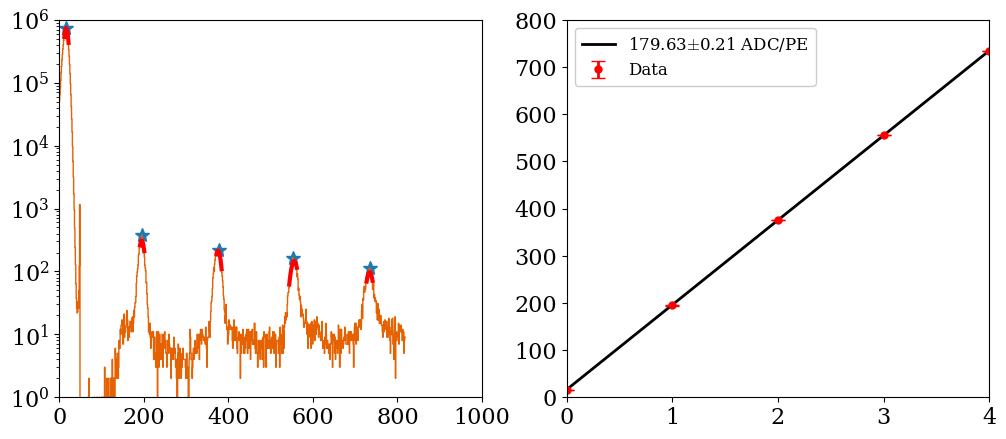

In [158]:
gain_list_0V,gain_err_0V=gain_calculator(Path)

[31.0V|2e-06]: Gain 70.0 --> !NOTE:  Error is too small --> replacing 0.0 with 1e-08
[31.5V|2e-06]: Gain 80.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735914701e-14 with 1e-08
[32.0V|2e-06]: Gain 90.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735915192e-14 with 1e-08
[32.5V|2e-06]: Gain 98.0, Err 0.7071067811882156 added to the array
[33.0V|2e-06]: Gain 104.50000000000001, Err 1.3228756555355718 added to the array
[33.5V|2e-06]: Gain 115.00000000000003, Err 1.5811388300883744 added to the array
[34.0V|2e-06]: Gain 123.50000000007306, Err 0.8660254037868367 added to the array
[34.5V|2e-06]: Gain 131.50000000009052, Err 0.866025403786919 added to the array
[31.0V|5e-06]: Gain 73.49999999996399, Err 0.8660254037858988 added to the array
[31.5V|5e-06]: Gain 83.49999999998579, Err 0.8660254037861804 added to the array
[32.0V|5e-06]: Gain 93.50000000000762, Err 0.8660254037863997 added to the array
[32.5V|5e-06]: Gain 102.0, Err 0.707106781188

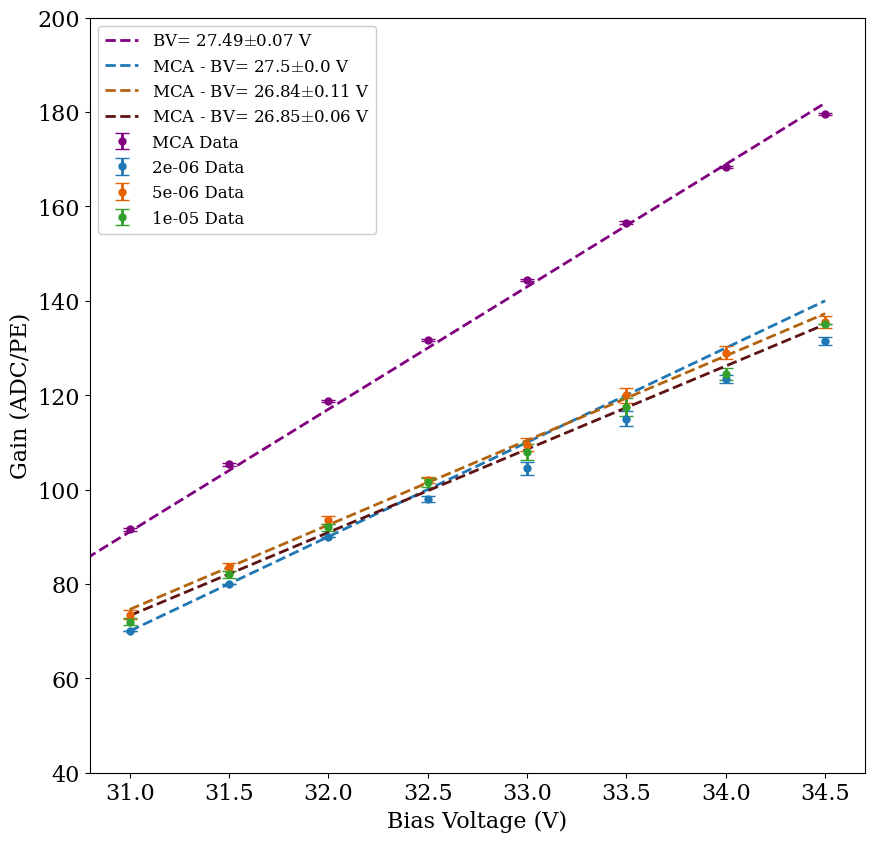

In [171]:
def line(x,a,b):
    return a*(x-b)
plt.figure(figsize=(10,10))
volts = voltages.astype(float) + 27.5
x_data=np.arange(np.min(volts),np.max(volts)+0.1,1)
plt.errorbar(volts,gain_list_0V,yerr=gain_err_0V,label='MCA Data',fmt='o',ms=5,color='purple')

popt_0,pcov_0=curve_fit(line,volts,gain_list_0V,p0=[31,27],sigma=gain_err_0V)
label = 'BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
plt.plot(x_data, line(x_data,*popt_0), color='purple', ls='--', label=label)
# plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')

summarized_data = {}
#plt.figure(figsize=(10,10))
for ii, sh_time in enumerate(peaks.keys()):

    #print(peaks[sh_time])

    gain_temp = []
    err_temp = []
    for volt in peaks[sh_time].keys():
        opt = float(peaks[sh_time][volt]['popt'])
        err = peaks[sh_time][volt]['perr']
        if err < 1e-08:
            err = 1e-08
            print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_YELLOW} Gain {opt} --> !NOTE:  Error is too small --> replacing {peaks[sh_time][volt]["perr"]} with {err}{ANSI_RESET}') 
        else: print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_RESET} Gain {opt}, Err {err} added to the array{ANSI_RESET}')        

        gain_temp.append(opt)
        err_temp.append(err)

    volts = [float(x) + 27.5 for x in np.array([*peaks[sh_time].keys()])]
    x_data=np.arange(np.min(volts),np.max(volts)+0.1,0.5)
    plt.xlim(np.min(volts)-0.2,np.max(volts)+0.2)

    plt.errorbar(volts,gain_temp,yerr=err_temp,label=str(sh_time)+' Data',fmt='o',ms=5,color=colors[ii])
    popt_0,pcov_0=curve_fit(line,x_data,gain_temp,p0=[31,27],sigma=err_temp)
    if pcov_0[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = 'MCA - BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_0), color=colors[-ii], ls='--', label=label)
    # plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')
    plt.legend(loc=2)
    plt.ylabel('Gain (ADC/PE)')
    plt.xlabel('Bias Voltage (V)')
    #plt.title(f'Shaping time: {sh_time}')
    #plt.show()

plt.show()

In [164]:
print (voltages)

['2.00' '2.50' '3.00' '3.50' '4.00' '4.50' '5.00' '5.50' '6.00' '6.50'
 '7.00']


[31.0V|2e-06]: Gain 70.0 --> !NOTE:  Error is too small --> replacing 0.0 with 1e-08
[31.5V|2e-06]: Gain 80.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735914701e-14 with 1e-08
[32.0V|2e-06]: Gain 90.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735915192e-14 with 1e-08
[32.5V|2e-06]: Gain 98.0, Err 0.7071067811882156 added to the array
[33.0V|2e-06]: Gain 104.50000000000001, Err 1.3228756555355718 added to the array
[33.5V|2e-06]: Gain 115.00000000000003, Err 1.5811388300883744 added to the array
[34.0V|2e-06]: Gain 123.50000000007306, Err 0.8660254037868367 added to the array
[34.5V|2e-06]: Gain 131.50000000009052, Err 0.866025403786919 added to the array
[31.0V|5e-06]: Gain 73.49999999996399, Err 0.8660254037858988 added to the array
[31.5V|5e-06]: Gain 83.49999999998579, Err 0.8660254037861804 added to the array
[32.0V|5e-06]: Gain 93.50000000000762, Err 0.8660254037863997 added to the array
[32.5V|5e-06]: Gain 102.0, Err 0.707106781188

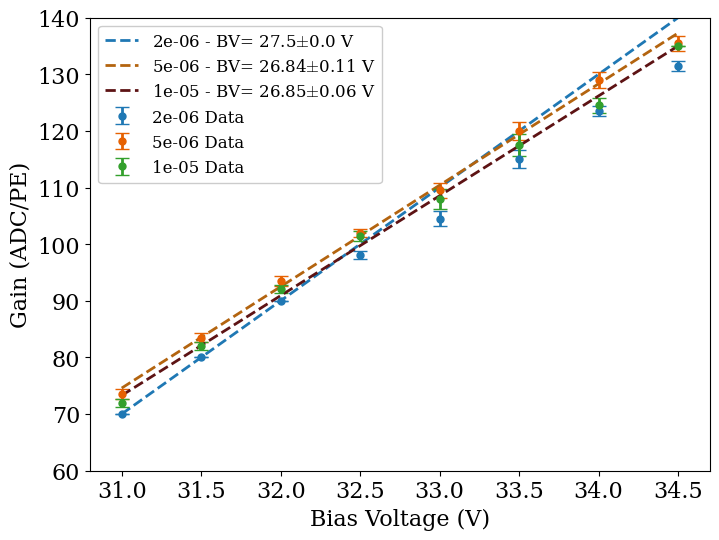